# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import deformations
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-06-15 13:15:20.390886: Importing os...
2024-06-15 13:15:20.391126: Importing sys...
Visible devices: [0]
2024-06-15 13:15:20.391368: Importing timer from timeit...
2024-06-15 13:15:20.391439: Setting env variables for tf import (only device(s) [0] will be available)...
2024-06-15 13:15:20.391571: Importing numpy...
2024-06-15 13:15:20.715252: Importing matplotlib...
2024-06-15 13:15:21.270222: Importing h5py...
2024-06-15 13:15:21.524665: Importing importlib.util...
2024-06-15 13:15:21.524821: Importing json...
2024-06-15 13:15:21.524887: Importing pandas...
2024-06-15 13:15:22.638151: Importing random...
2024-06-15 13:15:22.638310: Importing scipy utils...
2024-06-15 13:15:23.533728: Importing subprocess...
2024-06-15 13:15:23.533872: Importing textwrap...
2024-06-15 13:15:23.533935: Importing tensorflow...
Tensorflow version: 2.16.1
2024-06-15 13:15:33.098687: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-06-15 13:15:34.561240: Importing timeit.

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-06-15 13:15:44.676331: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-06-15 13:15:44.691659: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 150,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 150, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 150, 4)


# Particle level

## Init data

In [6]:
results_dir = "results_leo/particle_features_150/"
figures_dir = results_dir + "figures/"
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories waere created")

Results directories waere created


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 450])

## Plots

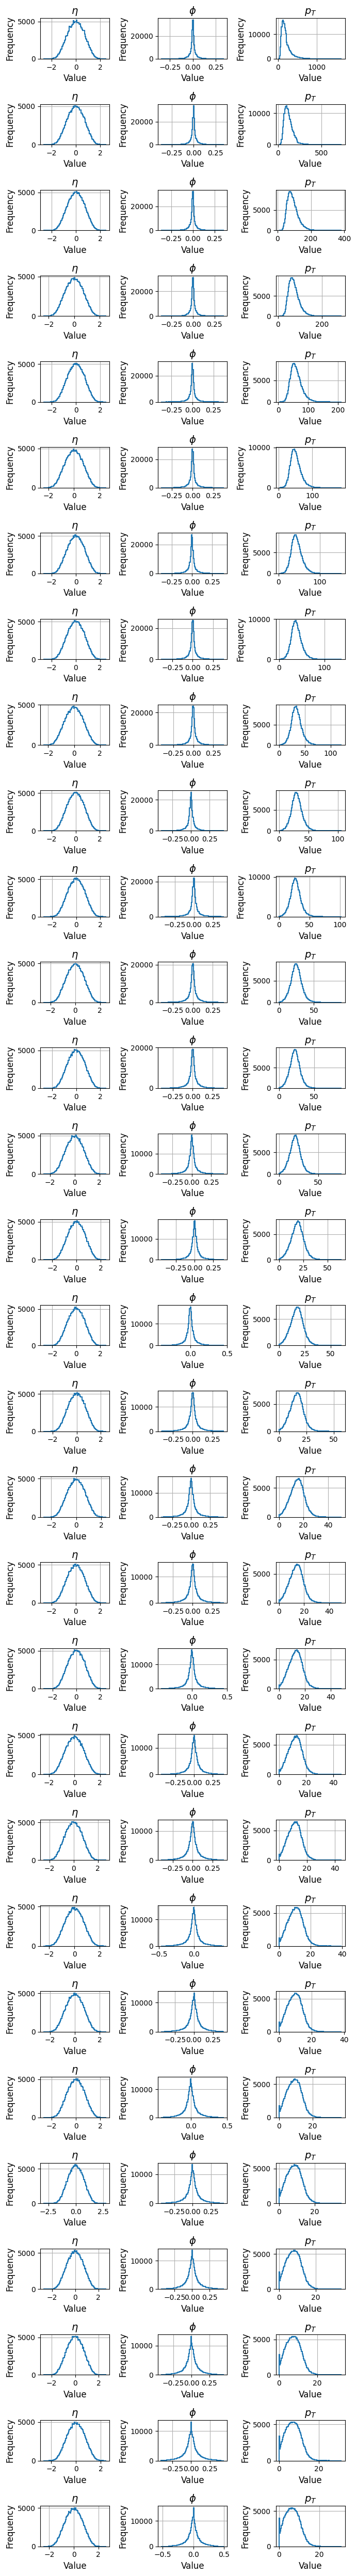

In [38]:
names = [r"$\eta$", r"$\phi$", r"$p_{T}$"] * particle_features.shape[1]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(30, 3, figsize=(7, 50))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(particle_features_reduced.numpy()[:,:90].shape[1]):
    name = names[i]
    axs[i].hist(particle_features_reduced.numpy()[:, i], bins=100, histtype='step', linewidth=1.5)
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)

eps_mu = 0.5
eps_sigma = 0.2
eps_sigma_off_diag = 0.2
eps_power_plus = 0.1
eps_power_minus = 0.1
eps_shift_normal = 0.2
eps_shift_uniform = 0.2

preprocessed_jet_features_reduced = preprocess_data(jet_features_reduced, mean, std)
deformed1 = deformations.deform_mean(preprocessed_jet_features_reduced,
                                     eps = eps_mu,
                                     seed = 0)
deformed2 = deformations.deform_cov_diag(preprocessed_jet_features_reduced,
                                         eps = eps_sigma,
                                         seed = 0)
deformed3 = deformations.deform_cov_off_diag(preprocessed_jet_features_reduced,
                                             eps = eps_sigma_off_diag,
                                             seed = 0)
deformed4 = deformations.deform_power_abs(preprocessed_jet_features_reduced,
                                          eps = eps_power_plus,
                                          direction = "up")
deformed5 = deformations.deform_power_abs(preprocessed_jet_features_reduced,
                                          eps = eps_power_minus,
                                          direction = "down")
deformed6 = deformations.deform_random(preprocessed_jet_features_reduced,
                                       eps = eps_shift_normal,
                                       shift_dist = "normal",
                                       seed = 0)
deformed7 = deformations.deform_random(preprocessed_jet_features_reduced,
                                       eps = eps_shift_uniform,
                                       shift_dist = "uniform",
                                       seed = 0)
jet_features_deform1_reduced = postprocess_data(deformed1, mean, std)
jet_features_deform2_reduced = postprocess_data(deformed2, mean, std)
jet_features_deform3_reduced = postprocess_data(deformed3, mean, std)
jet_features_deform4_reduced = postprocess_data(deformed4, mean, std)
jet_features_deform5_reduced = postprocess_data(deformed5, mean, std)
jet_features_deform6_reduced = postprocess_data(deformed6, mean, std)
jet_features_deform7_reduced = postprocess_data(deformed7, mean, std)

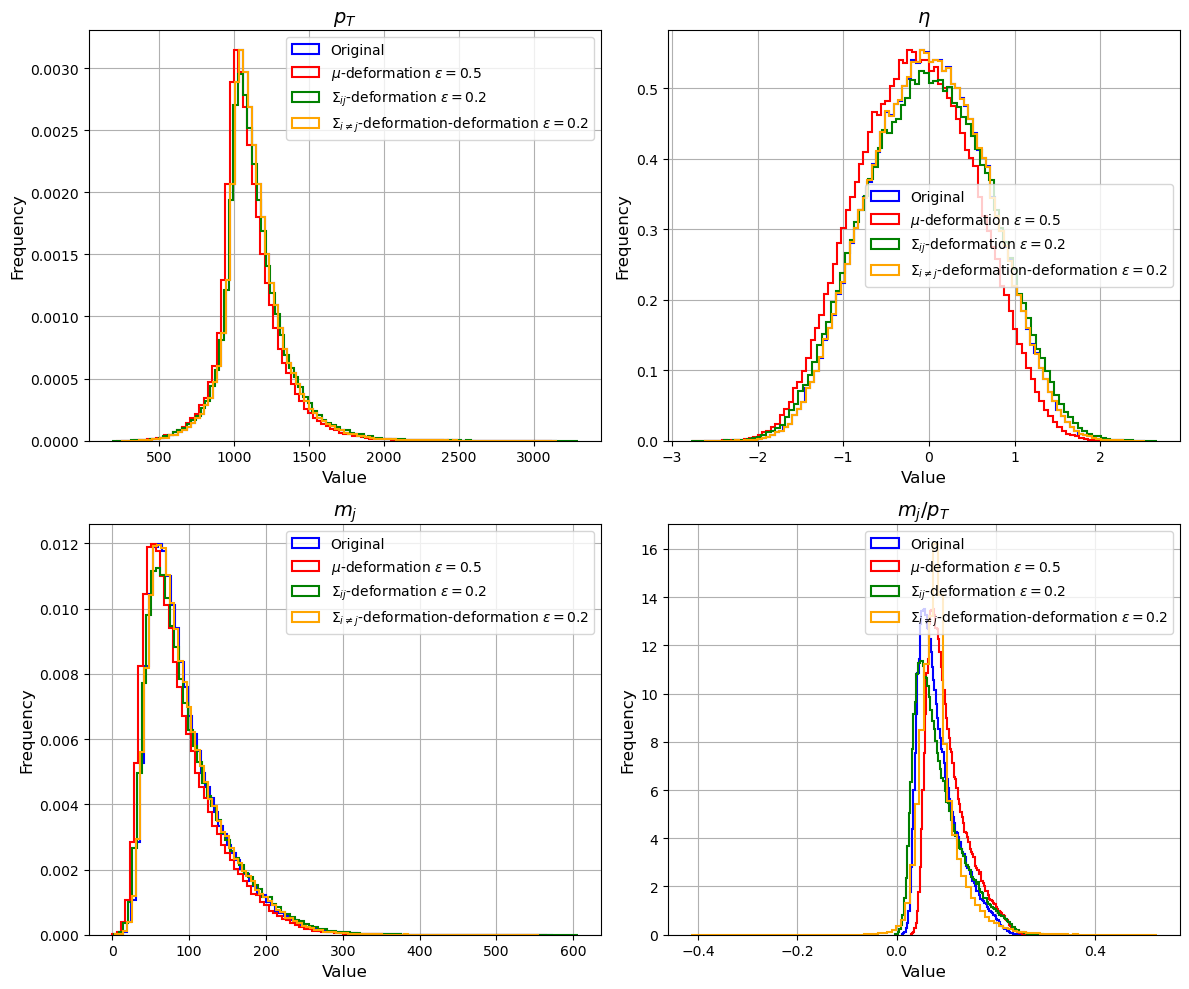

In [10]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform1_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\mu$-deformation $\epsilon='+str(eps_mu)+'$')
    axs[i].hist(jet_features_deform2_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\Sigma_{ij}$-deformation $\epsilon='+str(eps_sigma)+'$')
    axs[i].hist(jet_features_deform3_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\Sigma_{i\\neq j}$-deformation-deformation $\epsilon='+str(eps_sigma_off_diag)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_1.png")

# Show the plot
plt.show()

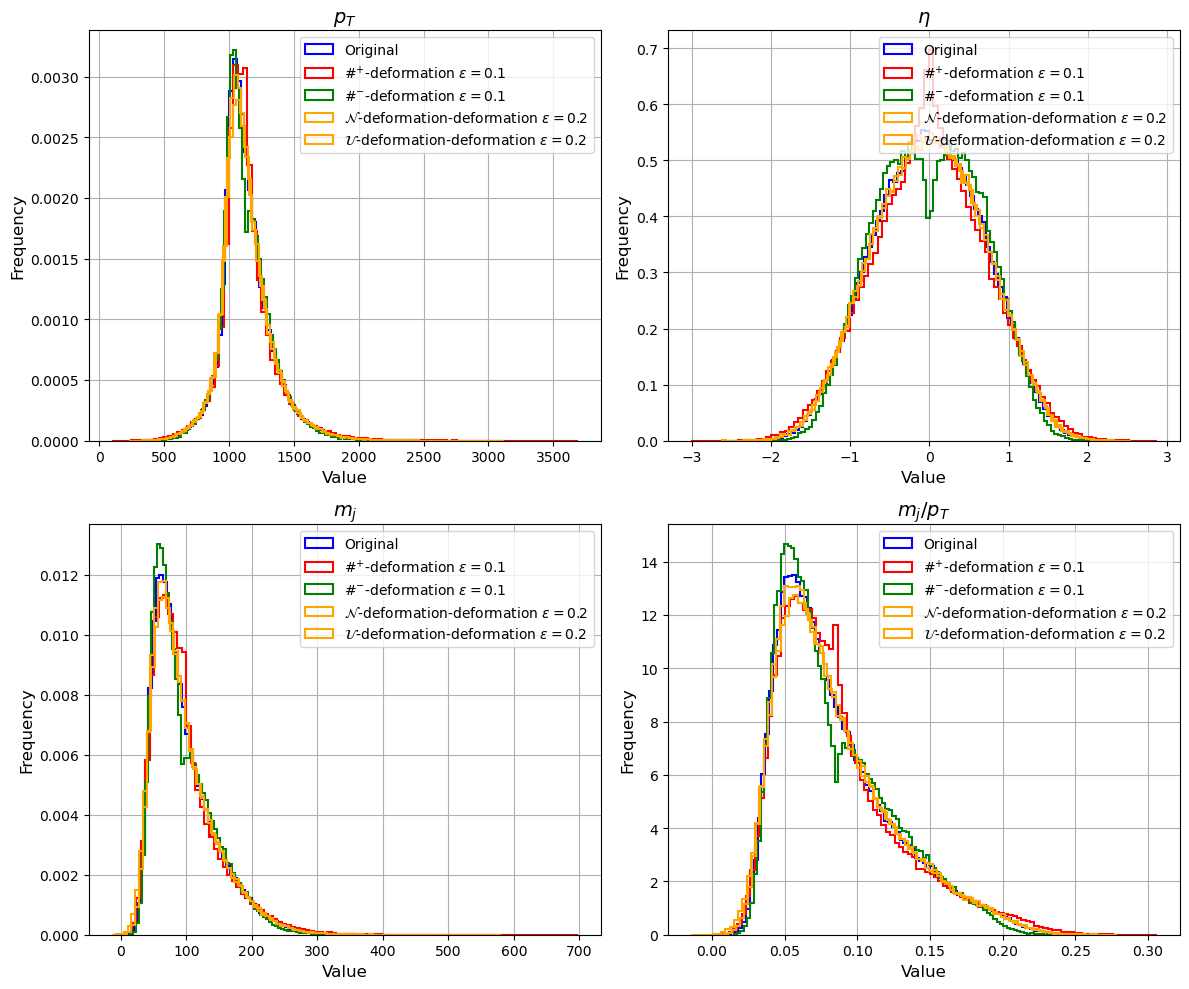

In [11]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform4_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\#^{+}$-deformation $\epsilon='+str(eps_power_plus)+'$')
    axs[i].hist(jet_features_deform5_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\#^{-}$-deformation $\epsilon='+str(eps_power_minus)+'$')
    axs[i].hist(jet_features_deform6_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{N}$-deformation-deformation $\epsilon='+str(eps_shift_normal)+'$')
    axs[i].hist(jet_features_deform7_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{U}$-deformation-deformation $\epsilon='+str(eps_shift_uniform)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_2.png")

# Show the plot
plt.show()

Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.7344701550900936 s.
Computing HPD quotas...
HPD quotas computed in 0.4096699170768261 s.
Plotting corner plot...


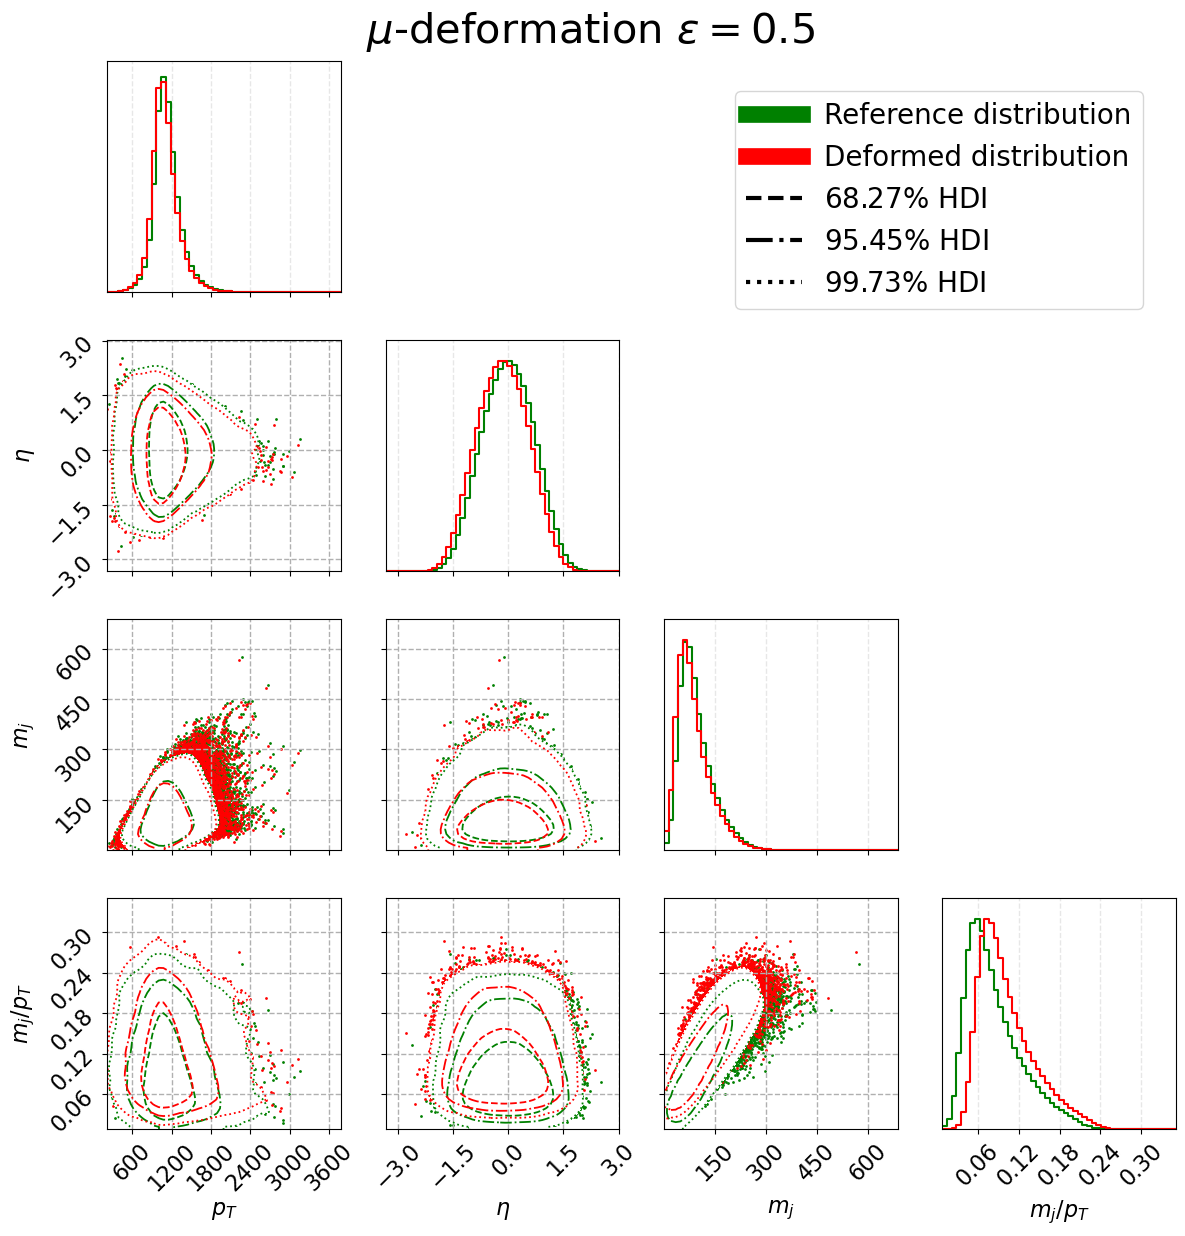

Plot done and saved in 3.480478179641068 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 1.051737330853939 s.
Computing HPD quotas...
HPD quotas computed in 0.4527154453098774 s.
Plotting corner plot...


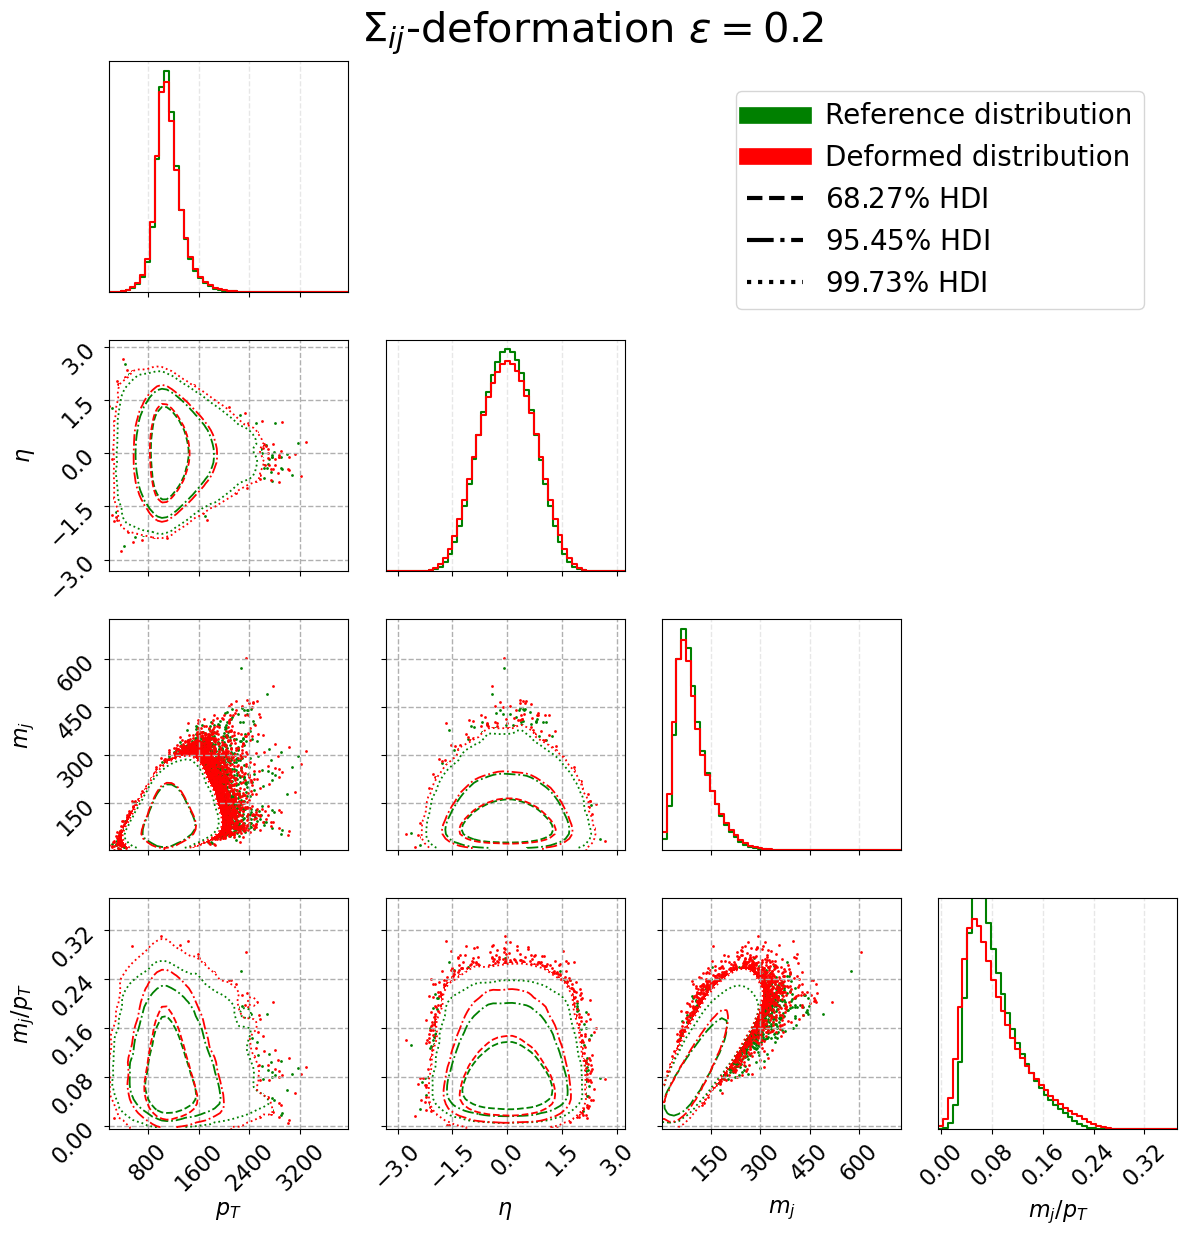

Plot done and saved in 3.812224476598203 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.6646979385986924 s.
Computing HPD quotas...
HPD quotas computed in 0.3967530960217118 s.
Plotting corner plot...


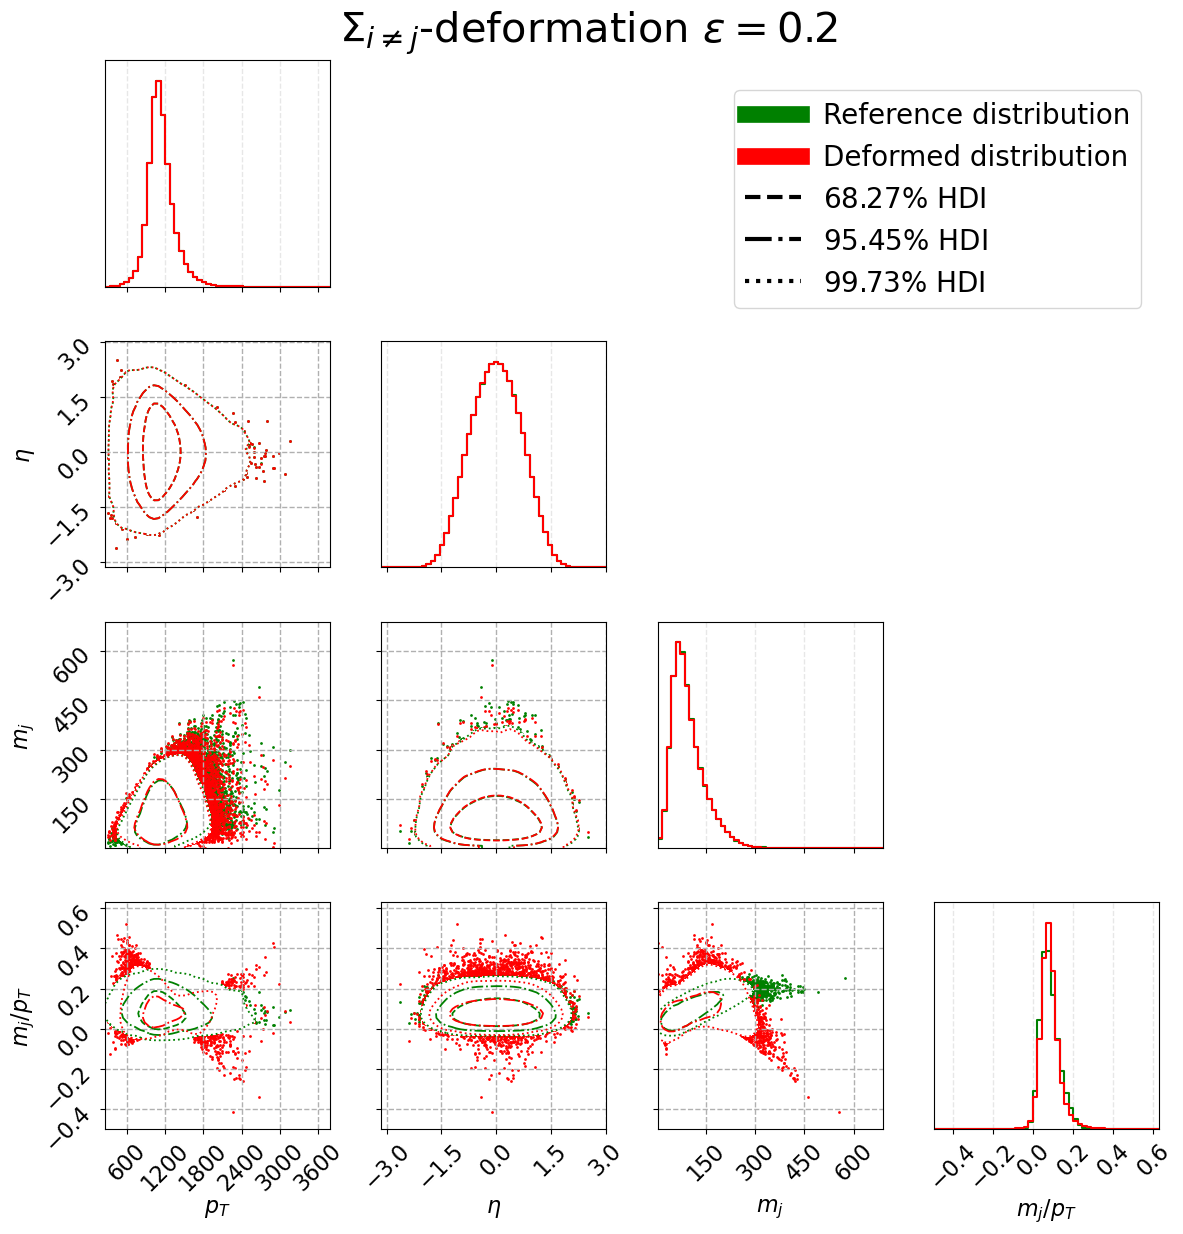

Plot done and saved in 3.8370073456317186 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 1.0916560627520084 s.
Computing HPD quotas...
HPD quotas computed in 0.6122003085911274 s.
Plotting corner plot...


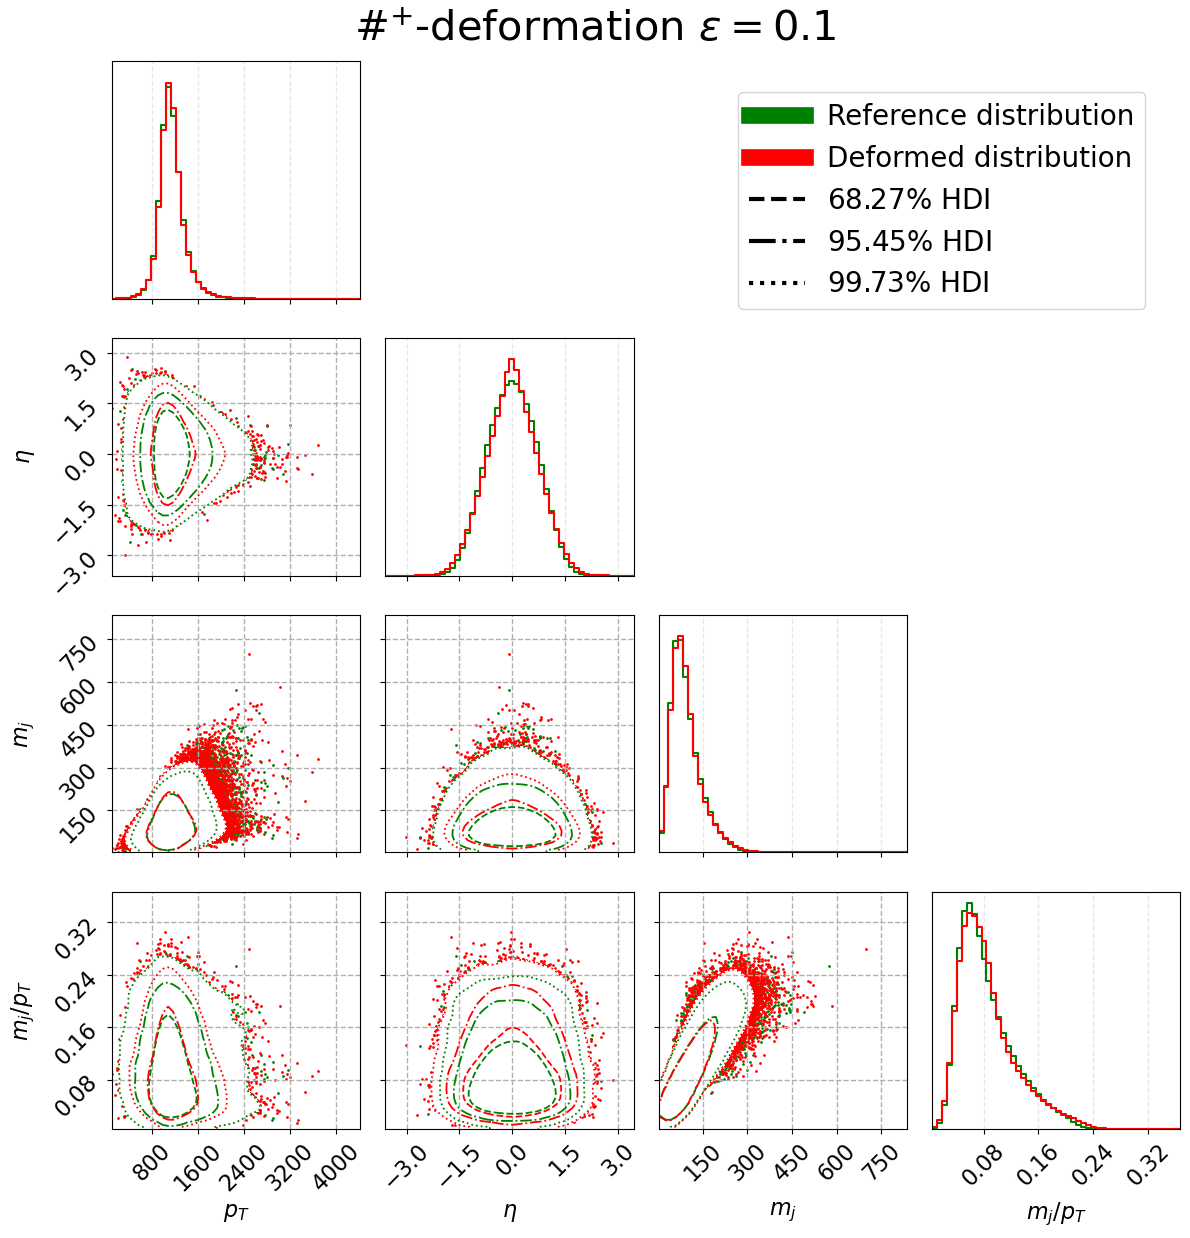

Plot done and saved in 4.653676032088697 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5926608629524708 s.
Computing HPD quotas...
HPD quotas computed in 0.4264351921156049 s.
Plotting corner plot...


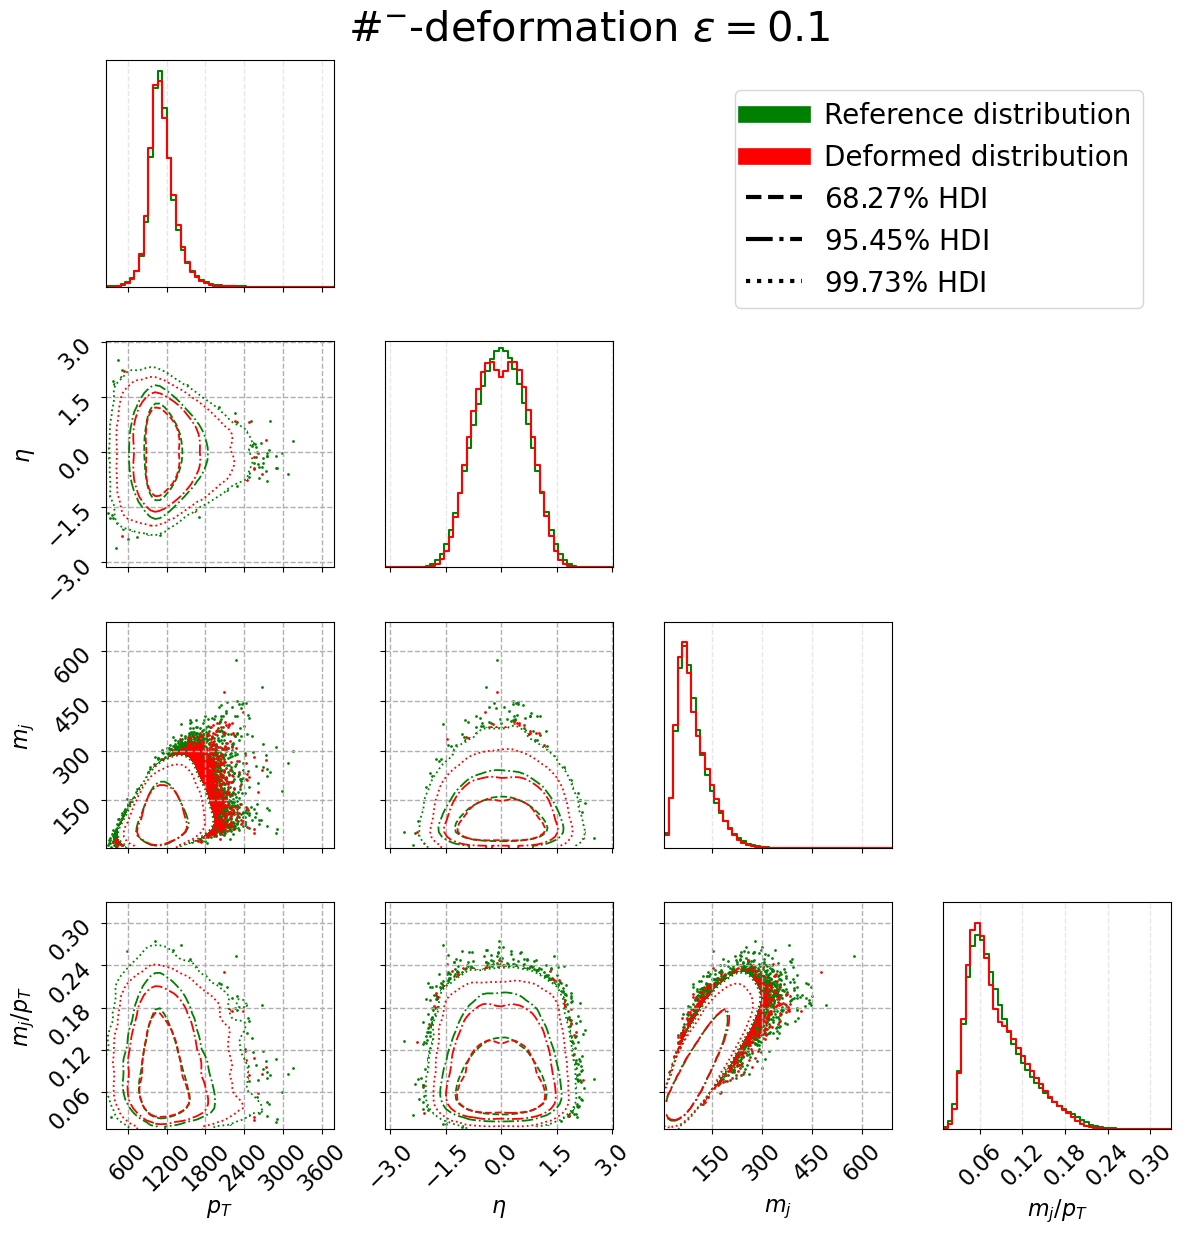

Plot done and saved in 3.352332907728851 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5701778270304203 s.
Computing HPD quotas...
HPD quotas computed in 0.4088859036564827 s.
Plotting corner plot...


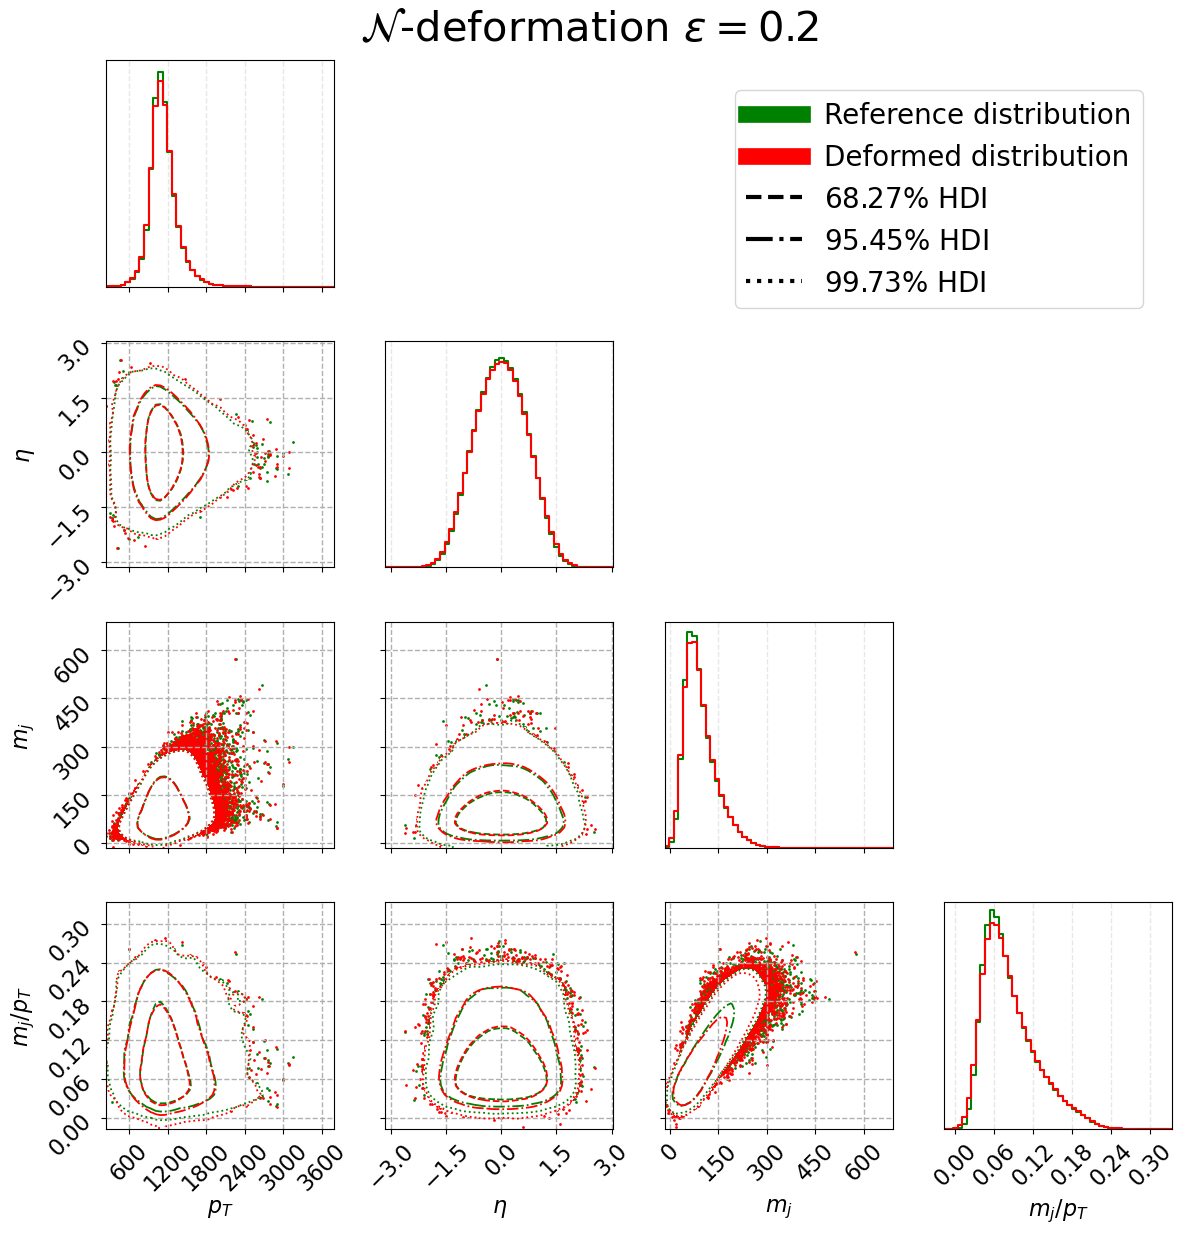

Plot done and saved in 3.319942519068718 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5913200005888939 s.
Computing HPD quotas...
HPD quotas computed in 0.4386537540704012 s.
Plotting corner plot...


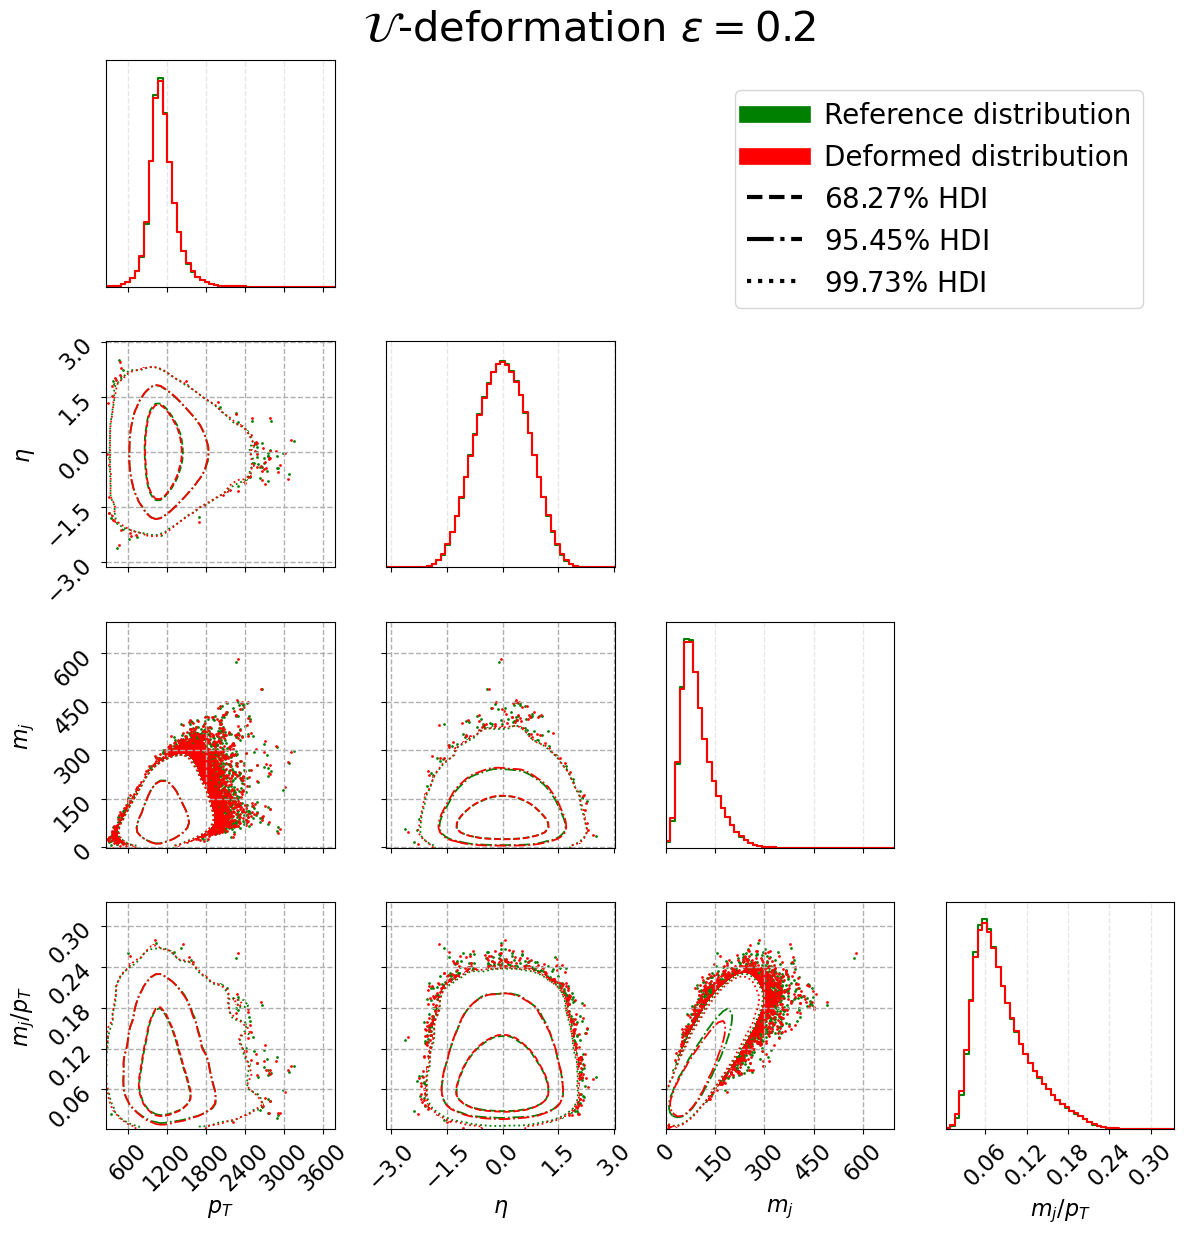

Plot done and saved in 3.4222759883850813 s.


In [12]:
ds = [jet_features_deform1_reduced.numpy(),
      jet_features_deform2_reduced.numpy(),
      jet_features_deform3_reduced.numpy(),
      jet_features_deform4_reduced.numpy(),
      jet_features_deform5_reduced.numpy(),
      jet_features_deform6_reduced.numpy(),
      jet_features_deform7_reduced.numpy()]

plot_titles = [r"$\mu$-deformation $\epsilon="+str(eps_mu)+"$",
               r"$\Sigma_{ij}$-deformation $\epsilon="+str(eps_sigma)+"$",
               r"$\Sigma_{i\neq j}$-deformation $\epsilon="+str(eps_sigma_off_diag)+"$",
               r"$\#^{+}$-deformation $\epsilon="+str(eps_power_plus)+"$",
               r"$\#^{-}$-deformation $\epsilon="+str(eps_power_minus)+"$",
               r"$\mathcal{N}$-deformation $\epsilon="+str(eps_shift_normal)+"$",
               r"$\mathcal{U}$-deformation $\epsilon="+str(eps_shift_uniform)+"$"]

for i in range(len(ds)):
    plot_corners(jet_features_reduced.numpy(),
                 ds[i],
                 max_points = 1_000_000,
                 max_dim = 32,
                 n_bins = 50,
                 w1 = None,
                 w2 = None,
                 sigma_contours = [1,2,3],
                 show_intervals_1d = False,
                 extend_range_percent = 20,
                 title1 = None,
                 title2 = None,
                 color1 = "green",
                 color2 = "red",
                 plot_title = plot_titles[i],
                 title_kwargs = {"fontsize": 30, "y": 1.03},
                 labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                 legend_labels = [r"Reference distribution",
                                  r"Deformed distribution",
                                  r'$68.27\%$ HDI',
                                  r'$95.45\%$ HDI',
                                  r'$99.73\%$ HDI'],
                 legend_kwargs = {"fontsize": 20, "loc": (0.62,0.75)},
                 figdir = figures_dir,
                 figname = "corner_plot_def_"+str(i+1)+".png",
                 save = True,
                 show = True)

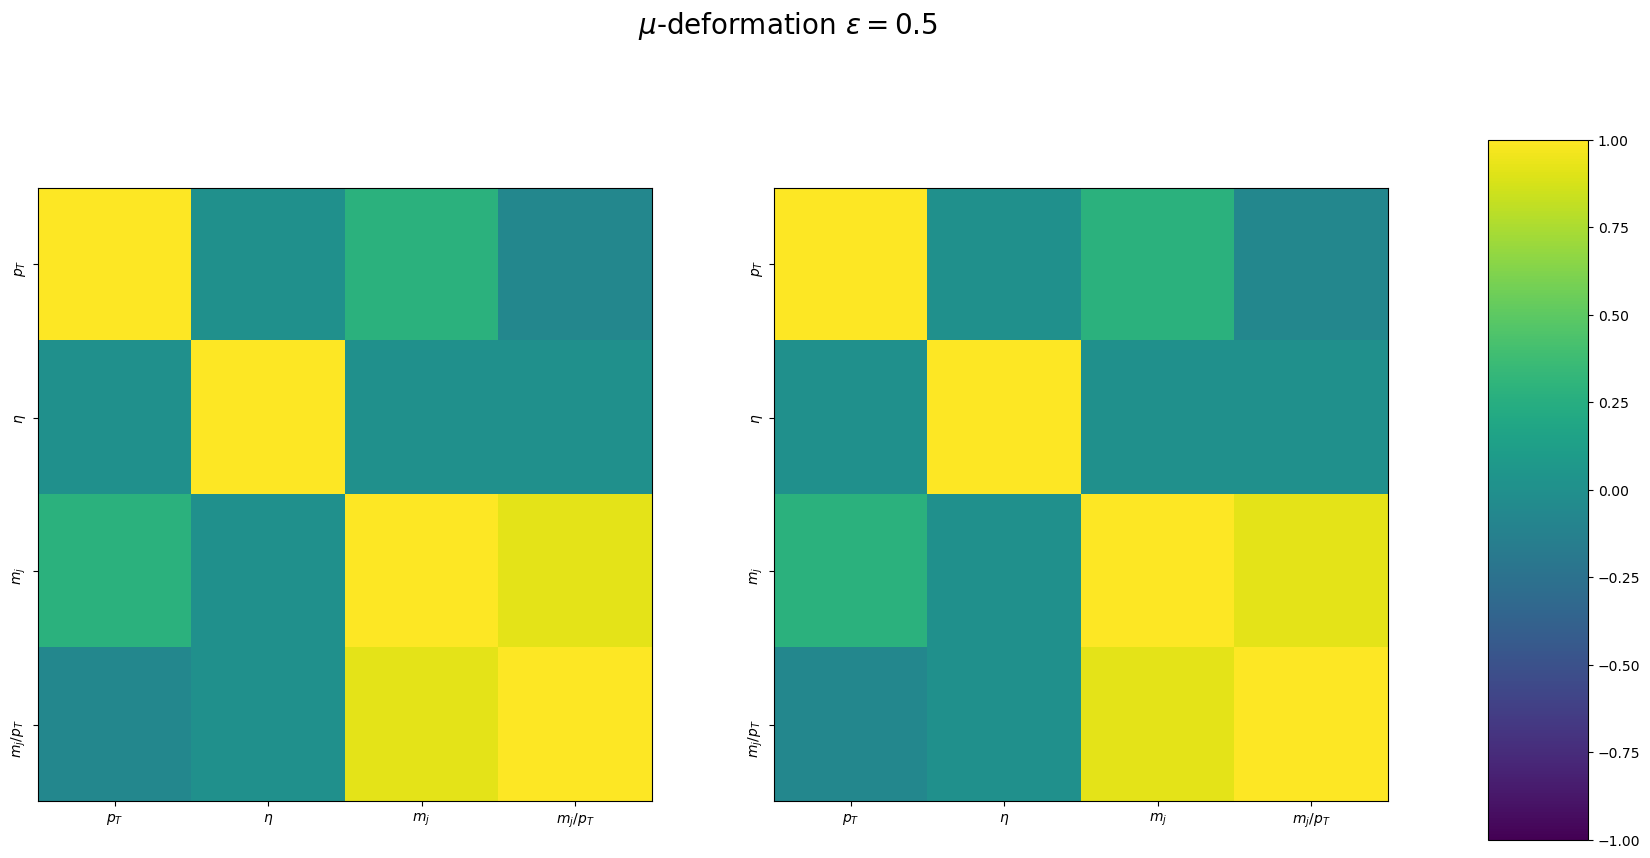

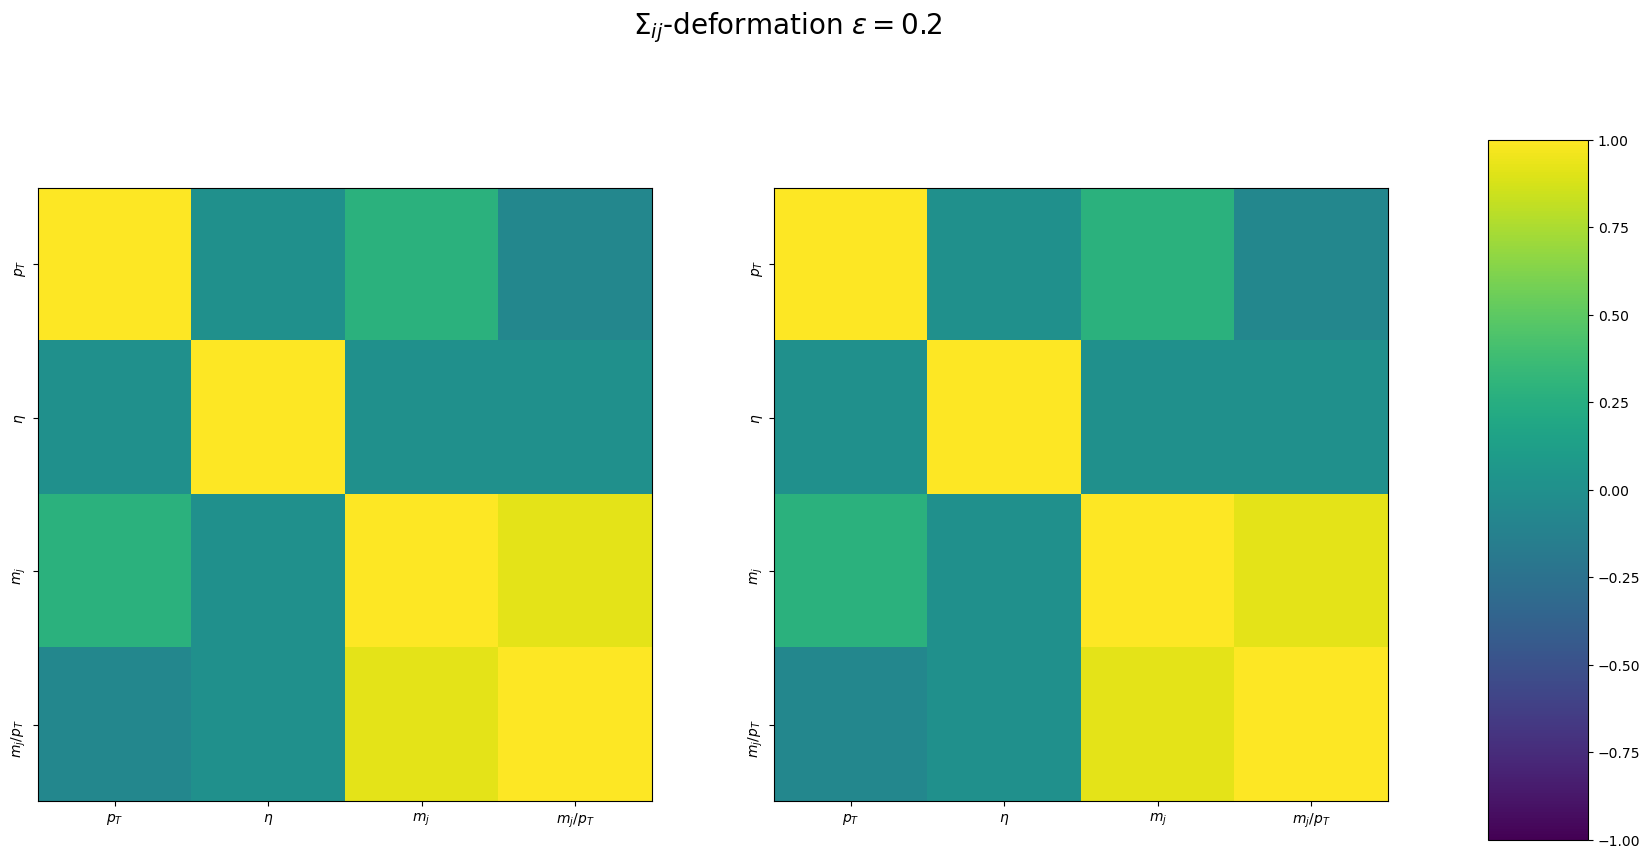

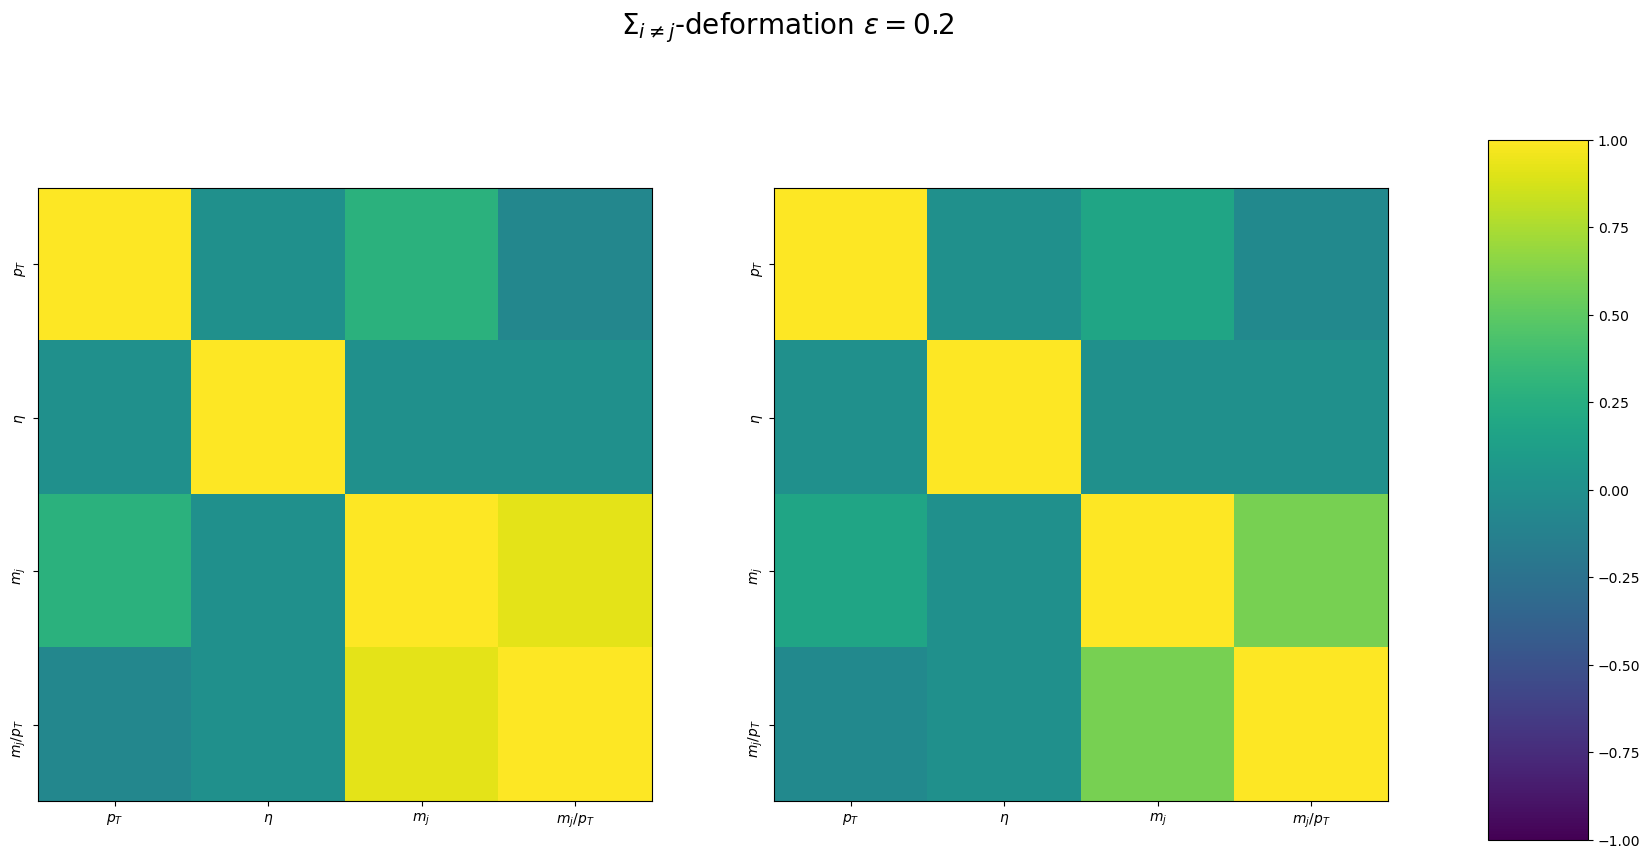

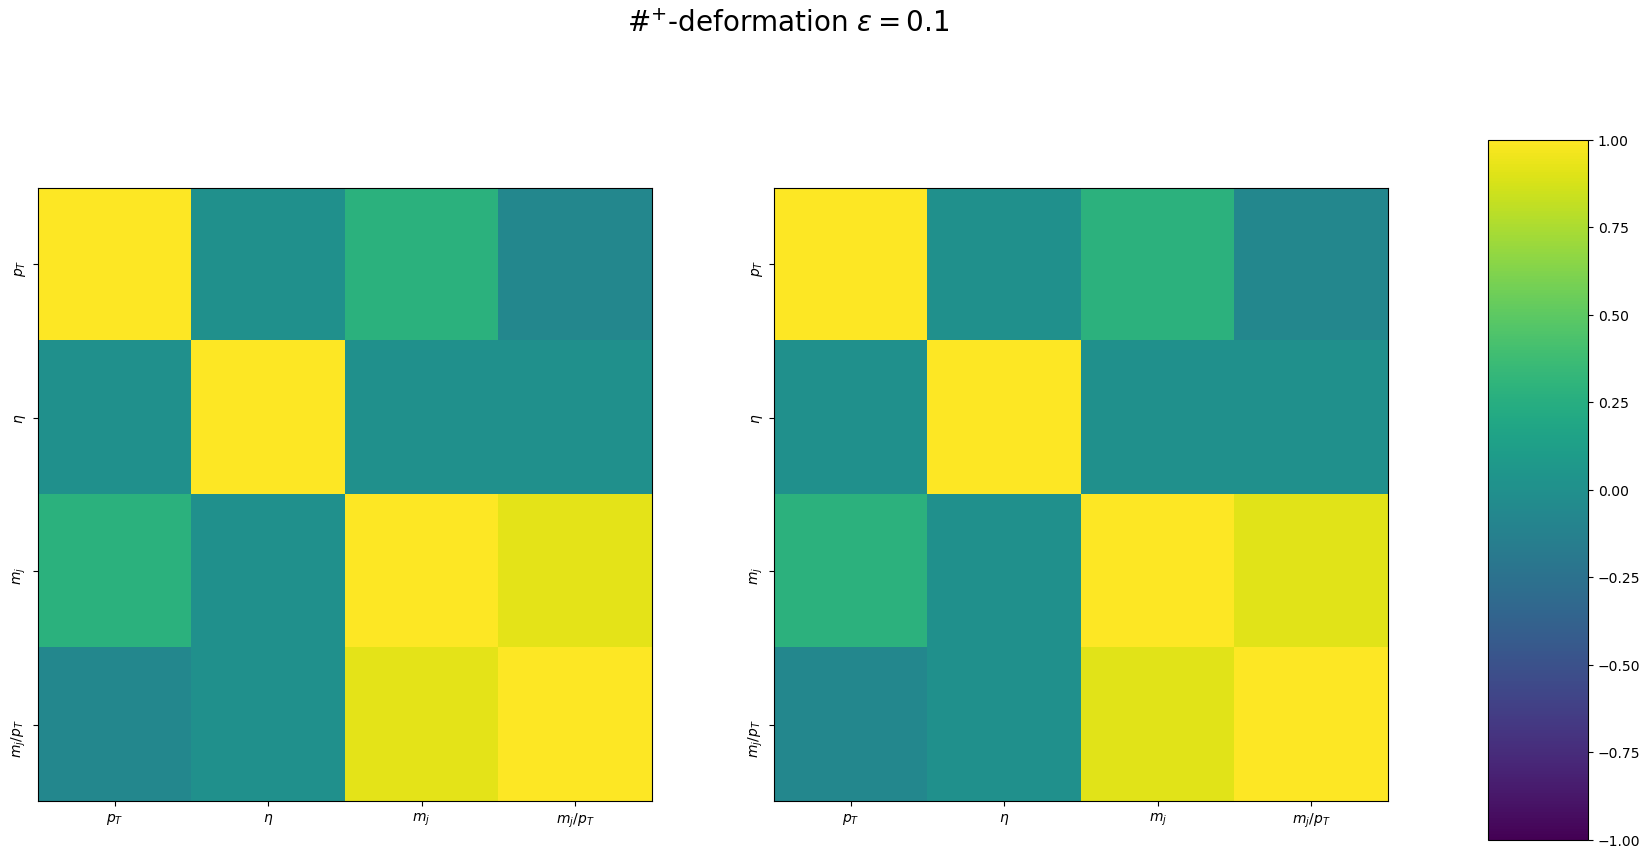

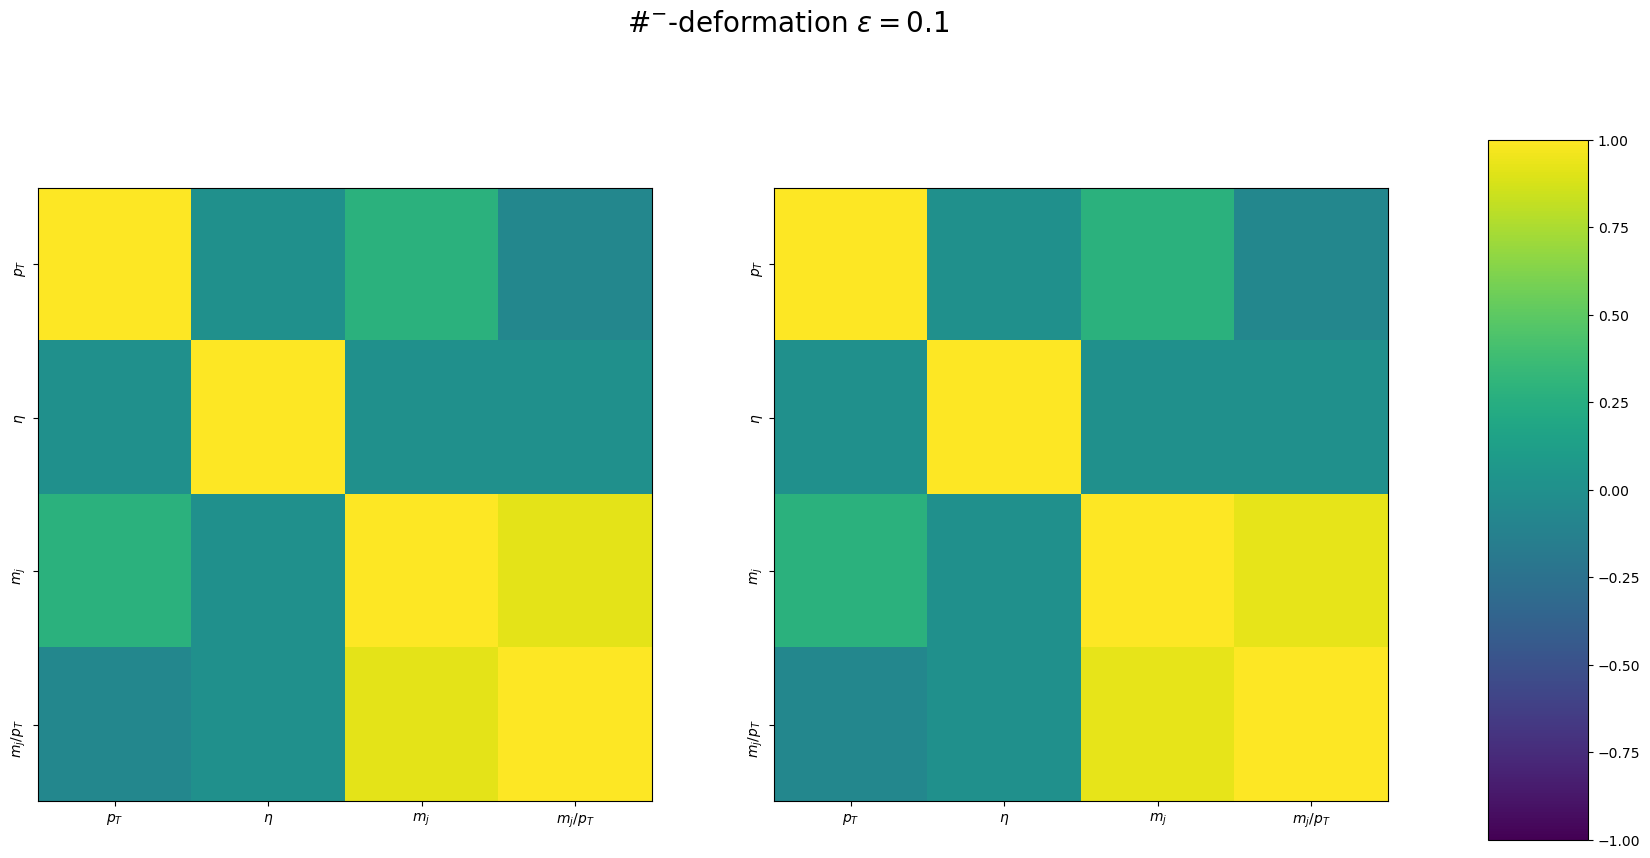

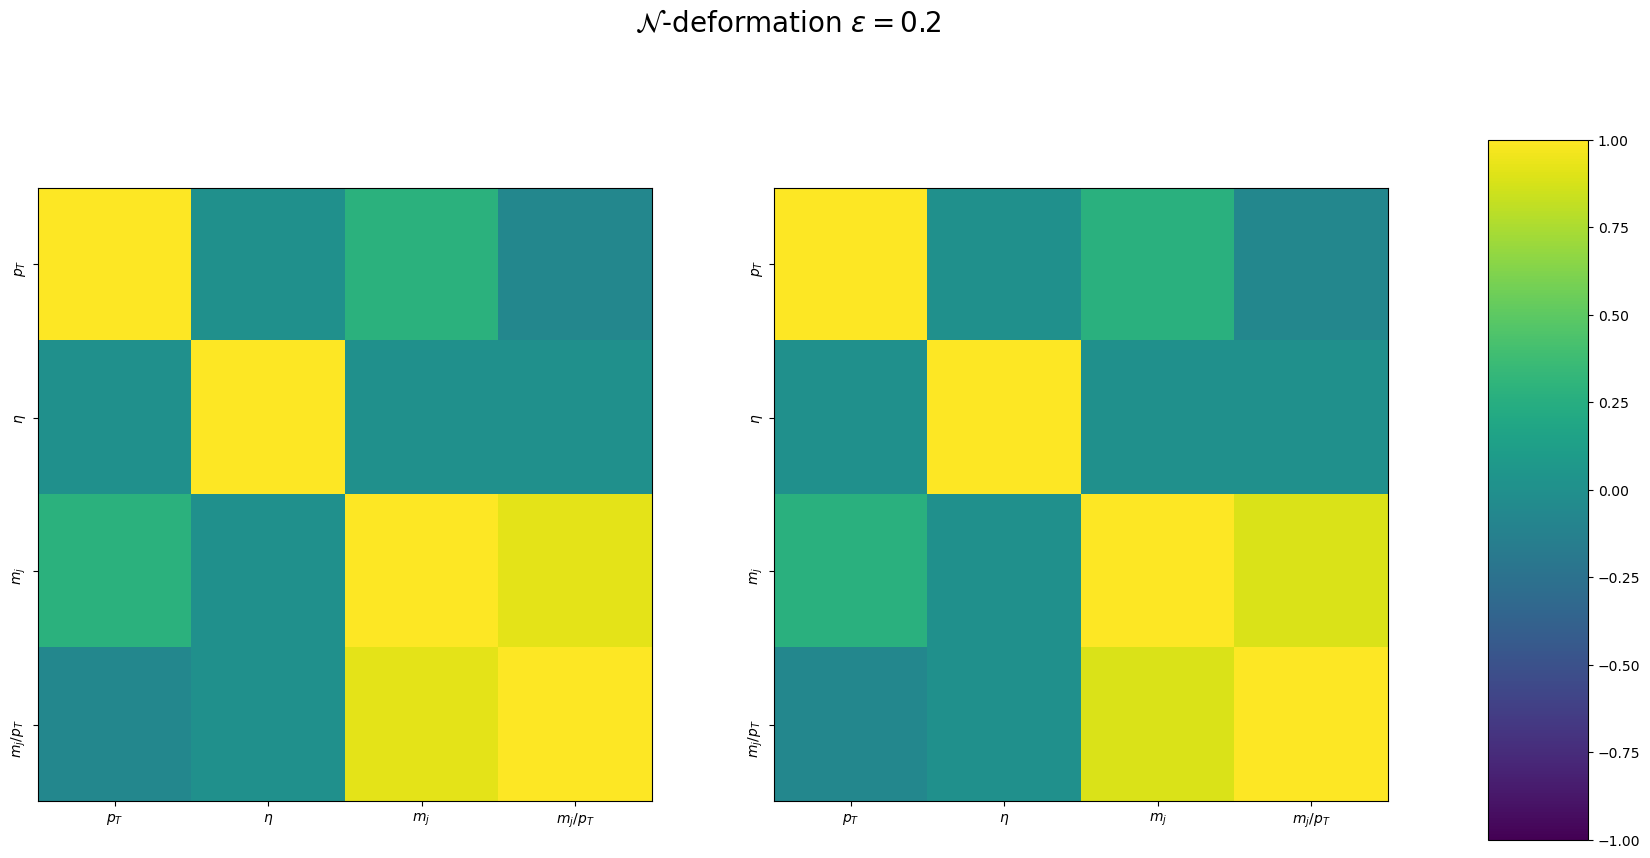

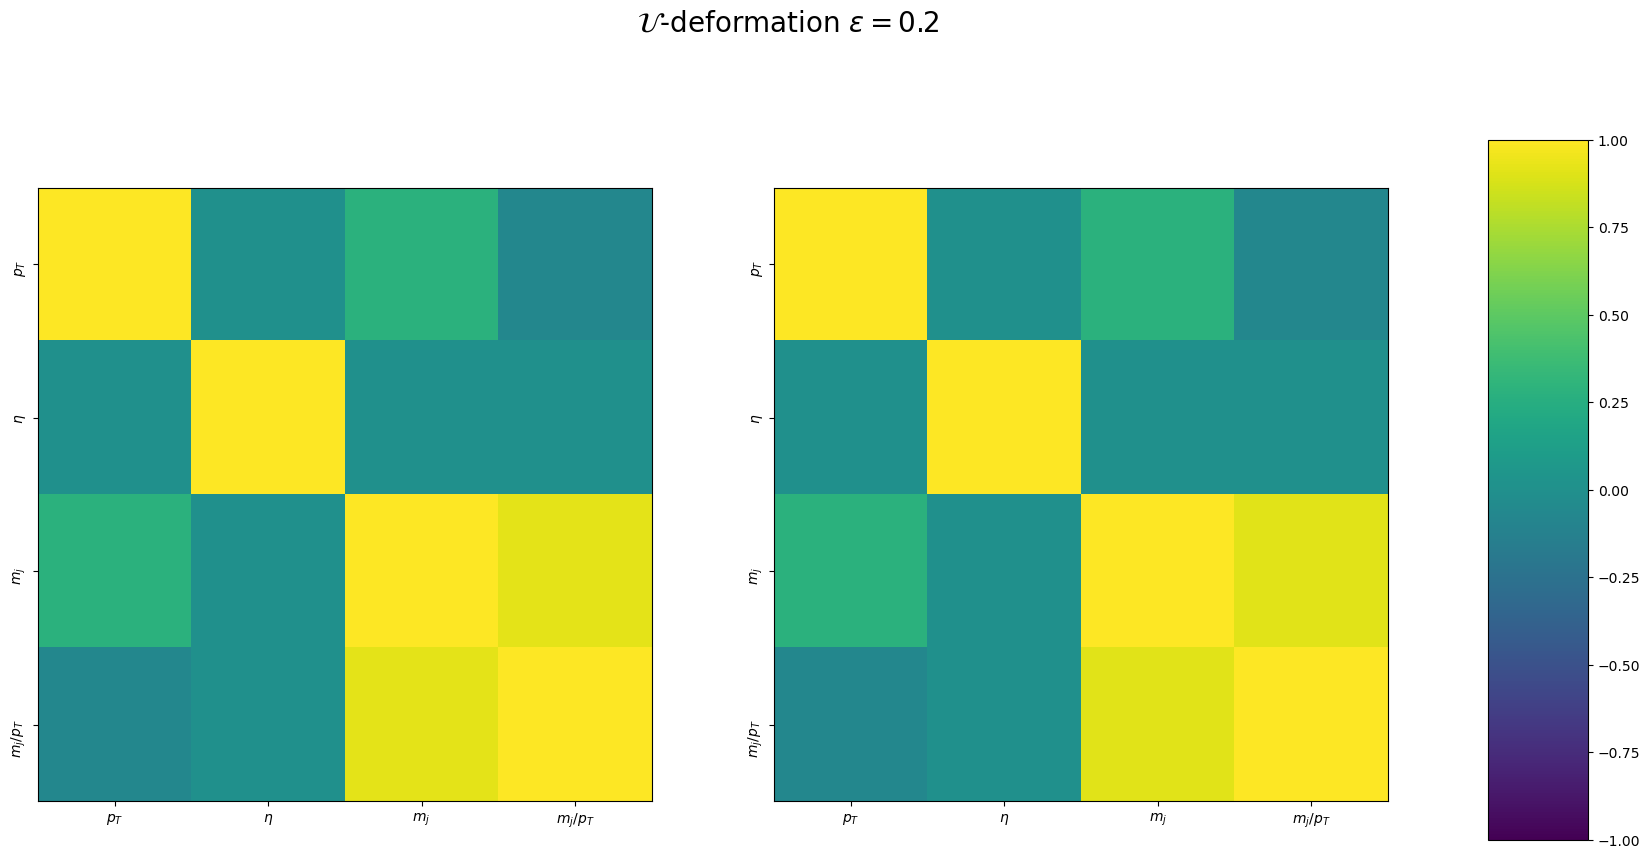

In [15]:
for i in range(len(ds)):
    plot_corr_matrix_side_by_side(dist_1 = jet_features_reduced.numpy(), 
                                  dist_2 = ds[i],
                                  path_to_plots = figures_dir, 
                                  figure_name = "corre_matrix_plot_def_"+str(i+1)+".pdf",
                                  max_points = 1_000_000,
                                  title = plot_titles[i],
                                  labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                                  show_labels = True,
                                  show = True,
                                  save = True)

## TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests")
if not os.path.exists(tests_dir):
    os.makedirs(tests_dir)
    
dataset = get_reduced_particle_features(particle_features)

## 10K

### Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(tests_dir, '10K', 'null_hypotheses')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
metrics_config_file = os.path.join(tests_dir, '10K', "metrics_config.json")

In [10]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 8, nbootstrap: 125
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [11]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 720,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 800,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 800,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [12]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 8

Testing from 0 to 8 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000


FGD metric calculation completed in 152.4991481709294 seconds.

Testing from 8 to 16 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 147.9038190629799 seconds.

Testing from 16 to 24 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 147.5663211500505 seconds.

Testing from 24 to 32 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 147.45319804002065 seconds.

Testing from 32 to 40 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 

In [19]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [408, 191], 4.4577638779739245e-05], [0.95, [570, 30], 7.448543633039335e-05], [0.99, [594, 6], 0.00011959992550350216]]
Computing time for metric fgd: 148.91037395969033
ThresholdS for metric mmd: [[0.68, [408, 191], 2746.20703125], [0.95, [570, 30], 72365.234375], [0.99, [594, 6], 129499.375]]
Computing time for metric mmd: 129.76520181261003
ThresholdS for metric ks: [[0.68, [408, 191], 0.896965621184943], [0.95, [570, 30], 0.9819947807132462], [0.99, [594, 6], 1.0392703985478076]]
Computing time for metric ks: 19.073471484705806
ThresholdS for metric sks: [[0.68, [408, 191], 0.9108953390102558], [0.95, [570, 30], 1.0818030487732582], [0.99, [594, 6], 1.2206786268323748]]
Computing time for metric sks: 70.2185449115932
ThresholdS for metric swd: [[0.68, [408, 191], 0.015897704081644884], [0.95, [570, 30], 0.020952556527507812], [0.99, [594, 6], 0.024422429300298917]]
Computing time for metric swd: 48.65299752075225


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f4be45dc790>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f4be45ddfc0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f4be45dd5a0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f4be45dc280>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f4be45dd3f0>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              5  $d_{\mathrm{MMD}}$   
2           6000      $\overline{D}$   
3            100     $\widetilde{D}$   
4            100     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
1  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
2  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
3  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
4  results/EW_MsplineN/run_2/tests/10K/null_hypot...   

                                          thresholds  
0  [[0.68, [408, 191], 4.4577638779739245e-05], [...  
1  [[0.68, [408, 191], 2746.20703125], [0.95, [57...  
2  [[0.68, [408, 191], 0.896965621184943], [0.95,...  
3  [[0.68, [408, 191], 0.9108953390102558], [0.95...  
4  [[0.68, [408, 191], 0.015897704081644884], [0....

#### Plots of null-distributions

mu = 2.719135545983529e-05 +/- 3.934048563106961e-11
sigma = 3.104257013029269e-05 +/- 2.5509261768487453e-06
68%CL = 4.4577638779739245e-05, 95%CL = 7.448543633039335e-05, 99%CL = 0.00011959992550350216
mu = 2.719135545983529e-05 +/- 3.934048563106961e-11
sigma = 3.104257013029269e-05 +/- 2.5509261768487453e-06


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


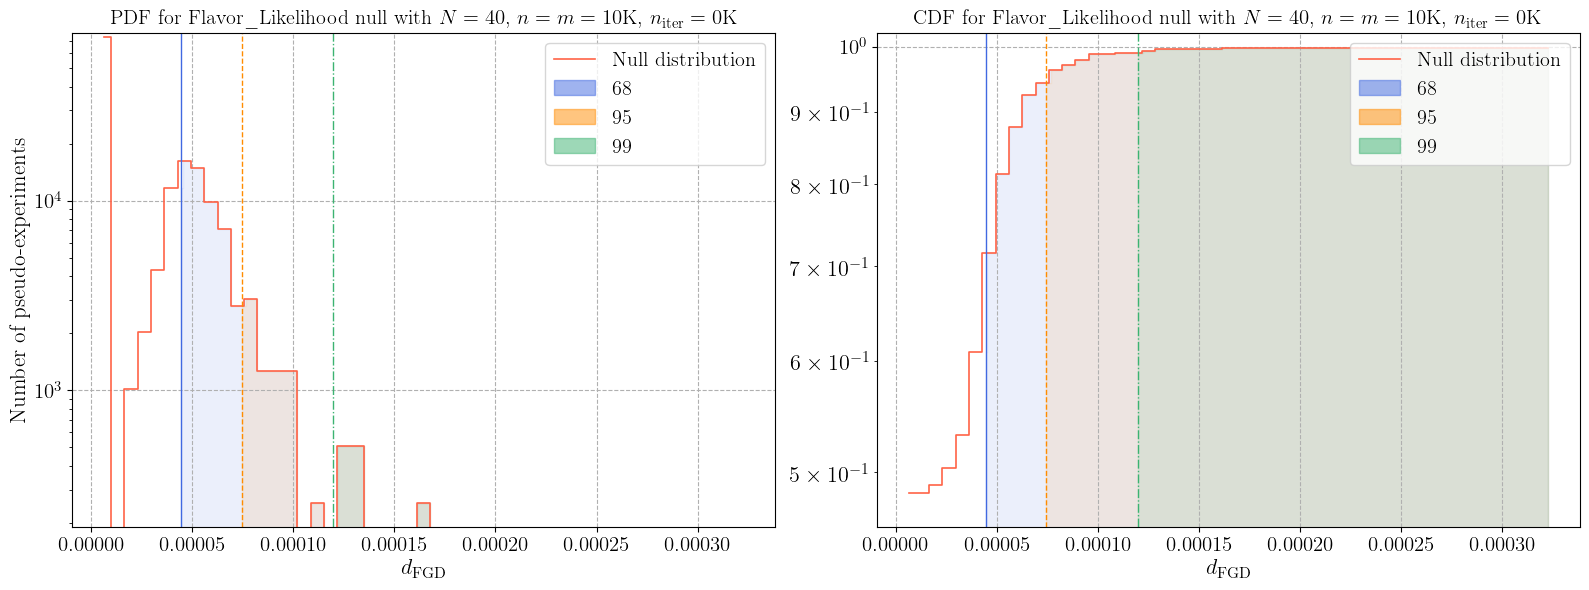

Time elapsed: 12.109236990101635 seconds.
mu = 419.73290364583335 +/- 59393415.31390173
sigma = 38142.307428925116 +/- 2919.7577919602127
68%CL = 2746.20703125, 95%CL = 72365.234375, 99%CL = 129499.375
mu = 419.73290364583335 +/- 59393415.31390173
sigma = 38142.307428925116 +/- 2919.7577919602127


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


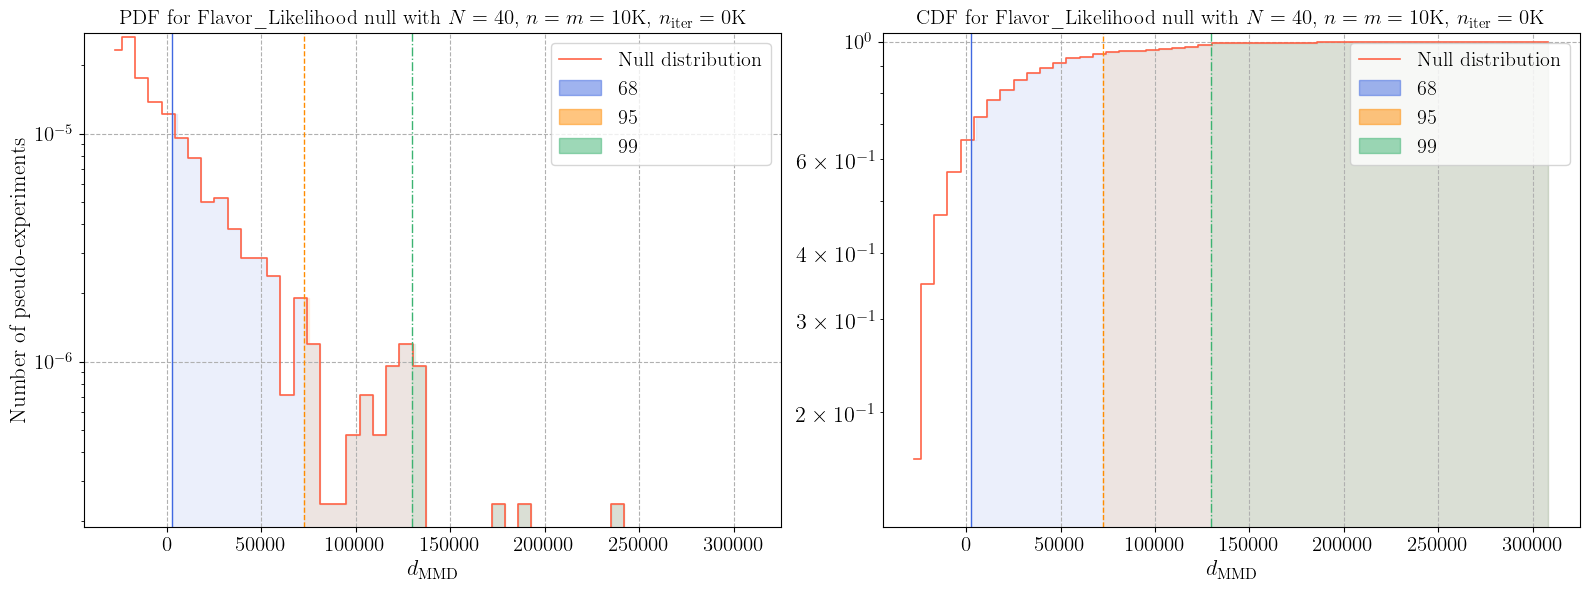

Time elapsed: 9.705525293014944 seconds.
mu = 0.8662105691797153 +/- 0.0001782817776784653
sigma = 0.0660832343146544 +/- 0.0020118671175824625
68%CL = 0.896965621184943, 95%CL = 0.9819947807132462, 99%CL = 1.0392703985478076
mu = 0.8662105691797153 +/- 0.0001782817776784653
sigma = 0.0660832343146544 +/- 0.0020118671175824625


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


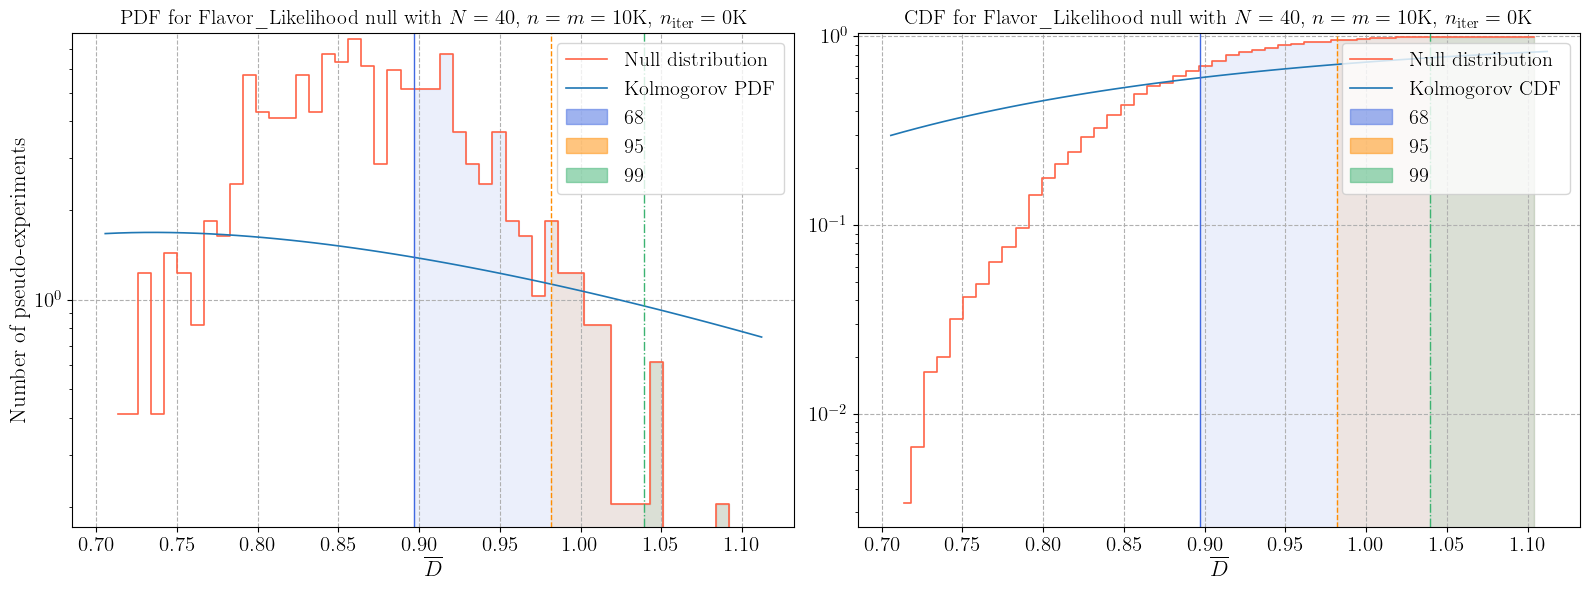

Time elapsed: 5.729966350831091 seconds.
mu = 0.8661222671363001 +/- 0.000555686989504452
sigma = 0.11666831536407898 +/- 0.003962134142497756
68%CL = 0.9108953390102558, 95%CL = 1.0818030487732582, 99%CL = 1.2206786268323748
mu = 0.8661222671363001 +/- 0.000555686989504452
sigma = 0.11666831536407898 +/- 0.003962134142497756


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


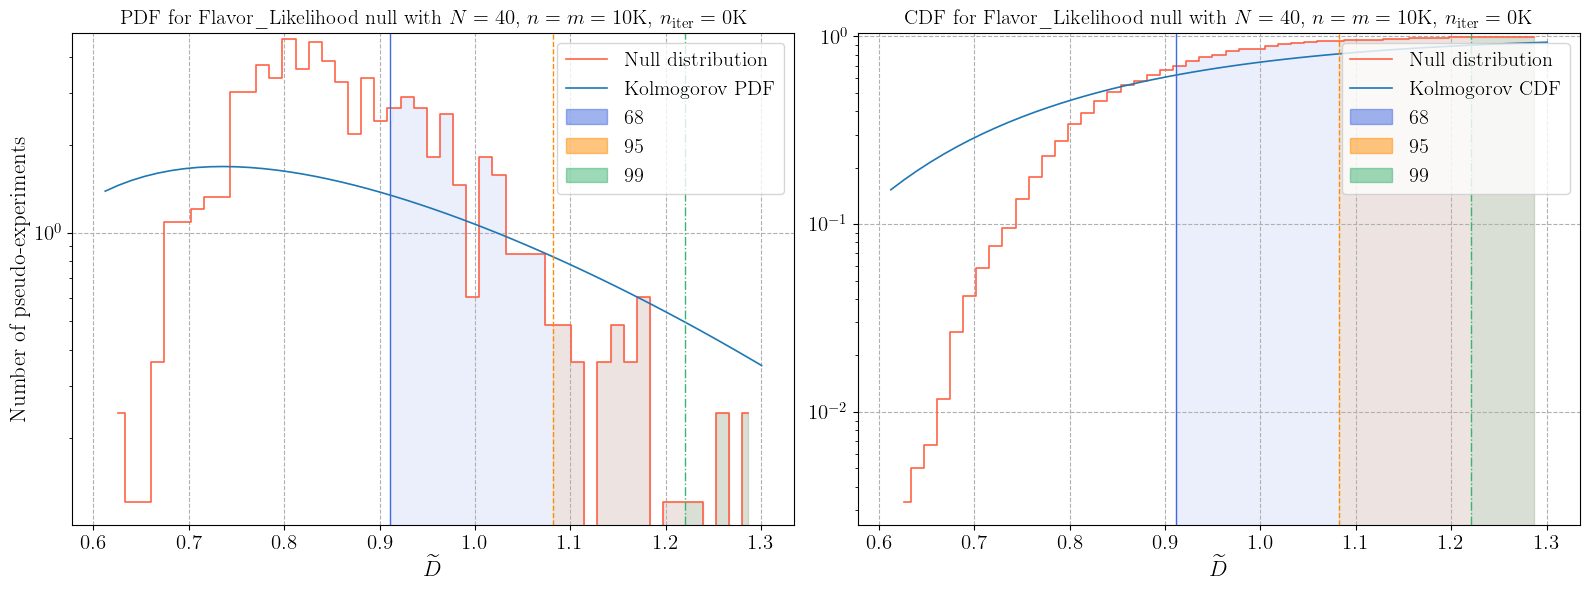

Time elapsed: 8.08307727612555 seconds.
mu = 0.015085520877520322 +/- 3.3786594368341095e-07
sigma = 0.002876802328086297 +/- 0.00012172428400288111
68%CL = 0.015897704081644884, 95%CL = 0.020952556527507812, 99%CL = 0.024422429300298917
mu = 0.015085520877520322 +/- 3.3786594368341095e-07
sigma = 0.002876802328086297 +/- 0.00012172428400288111


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


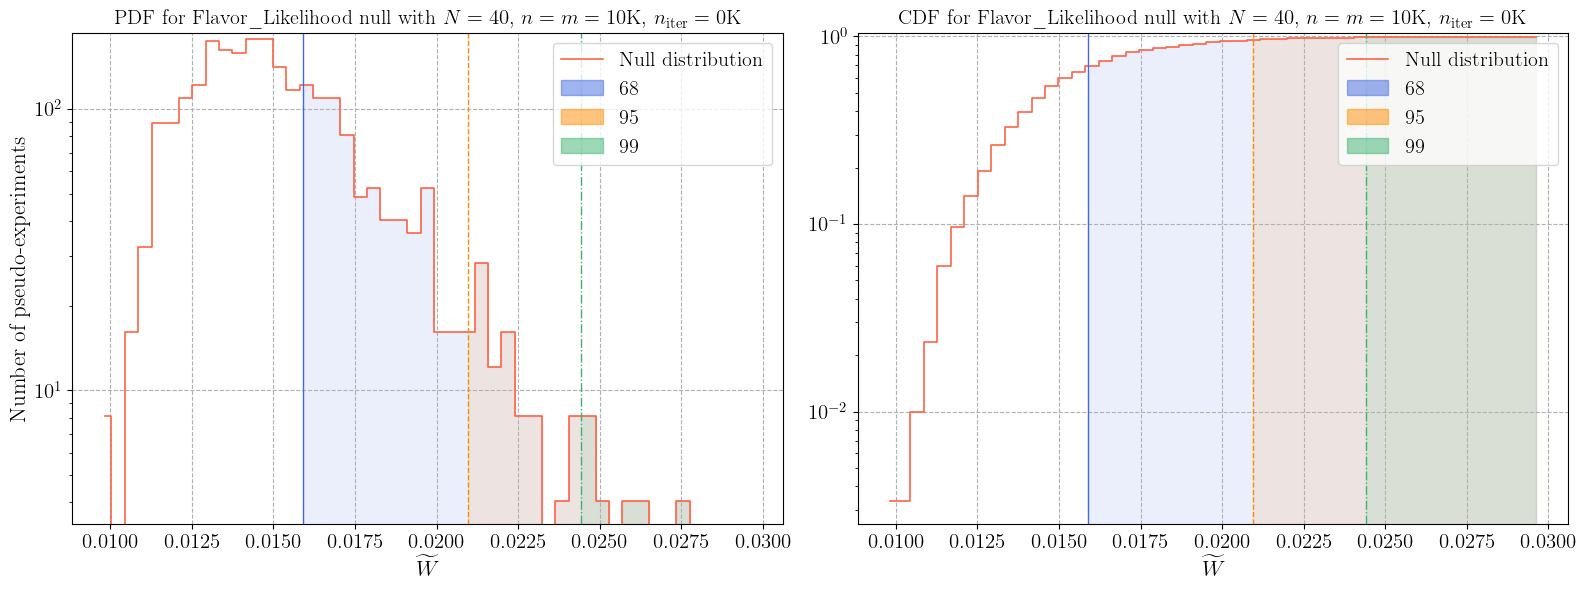

Time elapsed: 6.963683793321252 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f4be45dc790>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f4be45ddfc0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f4be45dd5a0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f4be45dc280>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f4be45dd3f0>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              5  $d_{\mathrm{MMD}}$   
2           6000      $\overline{D}$   
3            100     $\widetilde{D}$   
4            100     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
1  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
2  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
3  results/EW_MsplineN/run_2/tests/10K/null_hypot...   
4  results/EW_MsplineN/run_2/tests/10K/null_hypot...   

                                          thresholds  \
0  [[0.68, [408, 191], 4.4577638779739245e-05], [...   
1  [[0.68, [408, 191], 2746.20703125], [0.95, [57...   
2  [[0.68, [408, 191], 0.896965621184943], [0.95,...   
3  [[0.68, [408, 191], 0.9108953390102558], [0.95...   
4  [[0.68, [408, 191], 0.015897704081644884], [0....   

                                         null_figure  
0  results/EW_MsplineN/run_2/tests/10K/null_hypot...  
1  results/EW_MsplineN/run_2/tests/10K/null_hypot...  
2  results/EW_MsplineN/run_2/tests/10K/null_hypot...  
3  results/EW_MsplineN/run_2/tests/10K/null_hypot...  
4  results/EW_MsplineN/run_2/tests/10K/null_hypot...

In [20]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for EW_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for EW_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [21]:
#l = len(dataset) // 2
l = 1_000_000
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1000000 samples for dist_1_alt.


In [22]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(100_000, seed = 0).numpy(),means,stds)
for i in range(1,10):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(100_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9


In [23]:
niter_alt = 100

TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter_alt*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter_alt*batch_size_test],
                                                      niter = niter_alt,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [24]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 100
batch_size = 10000


FGD metric calculation completed in 29.26061704941094 seconds.
Thresholds for metric fgd: [[0.68, [408, 191], 4.4577638779739245e-05], [0.95, [570, 30], 7.448543633039335e-05], [0.99, [594, 6], 0.00011959992550350216]]
Value of the test-statistic for the alternative hypothesis: 4.769454026330981e-05

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 100
batch_size = 10000
nchunks = 20
Iterating from 0 to 5 out of 100 .
Iterating from 5 to 10 out of 100 .
Iterating from 10 to 15 out of 100 .
Iterating from 15 to 20 out of 100 .
Iterating from 20 to 25 out of 100 .
Iterating from 25 to 30 out of 100 .
Iterating from 30 to 35 out of 100 .
Iterating from 35 to 40 out of 100 .
Iterating from 40 to 45 out of 100 .
Iterating from 45 to 50 out of 100 .
Iterating from 50 to 55 out of 100 .
Iterating from 55 to 60 out of 100 .
Iterating from 60 to 65 out of 100 .
Iterating from 65 to 70 out of 100 .
Iterating from 70 to 75 out of 

## 20K

### Bootstrapping Null Hypothesis

In [25]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '20K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '20K', "metrics_config.json")

In [26]:
niter_tot = 600
batch_size_test = 20_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 300, nbootstrap: 2
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [27]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 100, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 4, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 20_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [28]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 100

Testing from 0 to 300 of 600 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 300
batch_size = 20000
nchunks = 3
Iterating from 0 to 100 out of 300 .
Iterating from 100 to 200 out of 300 .
Iterating from 200 to 300 out of 300 .
FGD metric calculation completed in 155.65335751976818 seconds.

Testing from 300 to 600 of 600 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 300
batch_size = 20000
nchunks = 3
Iterating from 0 to 100 out of 300 .
Iterating from 100 to 200 out of 300 .
Iterating from 200 to 300 out of 300 .
FGD metric calculation completed in 158.37041561305523 seconds.
All done in: 324.79 s.
Saving fgd to results/EW_MsplineN/run_2/tests/20K/null_hypotheses/FGD.json
Computing and savng mmd with max_vectorize = 4

Testing from 0 to 300 of 600 samples.

------------------------

In [29]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [408, 191], 4.635309012620329e-05], [0.95, [570, 30], 8.345693822306816e-05], [0.99, [594, 6], 0.00011231466100036058]]
Computing time for metric fgd: 314.0237731328234
ThresholdS for metric mmd: [[0.68, [408, 191], 3796.02197265625], [0.95, [570, 30], 38027.22265625], [0.99, [594, 6], 87892.62890625]]
Computing time for metric mmd: 519.5946317864582
ThresholdS for metric ks: [[0.68, [408, 191], 0.8962505497038364], [0.95, [570, 30], 0.9610002487897873], [0.99, [594, 6], 1.0178757831454277]]
Computing time for metric ks: 18.818854914978147
ThresholdS for metric sks: [[0.68, [408, 191], 0.9156507439911366], [0.95, [570, 30], 1.1124505661427975], [0.99, [594, 6], 1.2390006333589554]]
Computing time for metric sks: 83.60105984658003
ThresholdS for metric swd: [[0.68, [408, 191], 0.016088457607808387], [0.95, [570, 30], 0.021466707962708], [0.99, [594, 6], 0.02425266125560707]]
Computing time for metric swd: 41.88656183052808


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f4b88403d90>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f4b884032e0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f4b88403eb0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f4b88403520>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f4b883e9120>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            100  $d_{\mathrm{FGD}}$   
1              4  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            100     $\widetilde{D}$   
4            100     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
1  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
2  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
3  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
4  results/EW_MsplineN/run_2/tests/20K/null_hypot...   

                                          thresholds  
0  [[0.68, [408, 191], 4.635309012620329e-05], [0...  
1  [[0.68, [408, 191], 3796.02197265625], [0.95, ...  
2  [[0.68, [408, 191], 0.8962505497038364], [0.95...  
3  [[0.68, [408, 191], 0.9156507439911366], [0.95...  
4  [[0.68, [408, 191], 0.016088457607808387], [0....

#### Plots of null-distributions

mu = 4.4263885870624665e-05 +/- 1.2993944785167233e-11
sigma = 1.7840553374141203e-05 +/- 9.873830596638728e-07
68%CL = 4.635309012620329e-05, 95%CL = 8.345693822306816e-05, 99%CL = 0.00011231466100036058
mu = 4.4263885870624665e-05 +/- 1.2993944785167233e-11
sigma = 1.7840553374141203e-05 +/- 9.873830596638728e-07


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


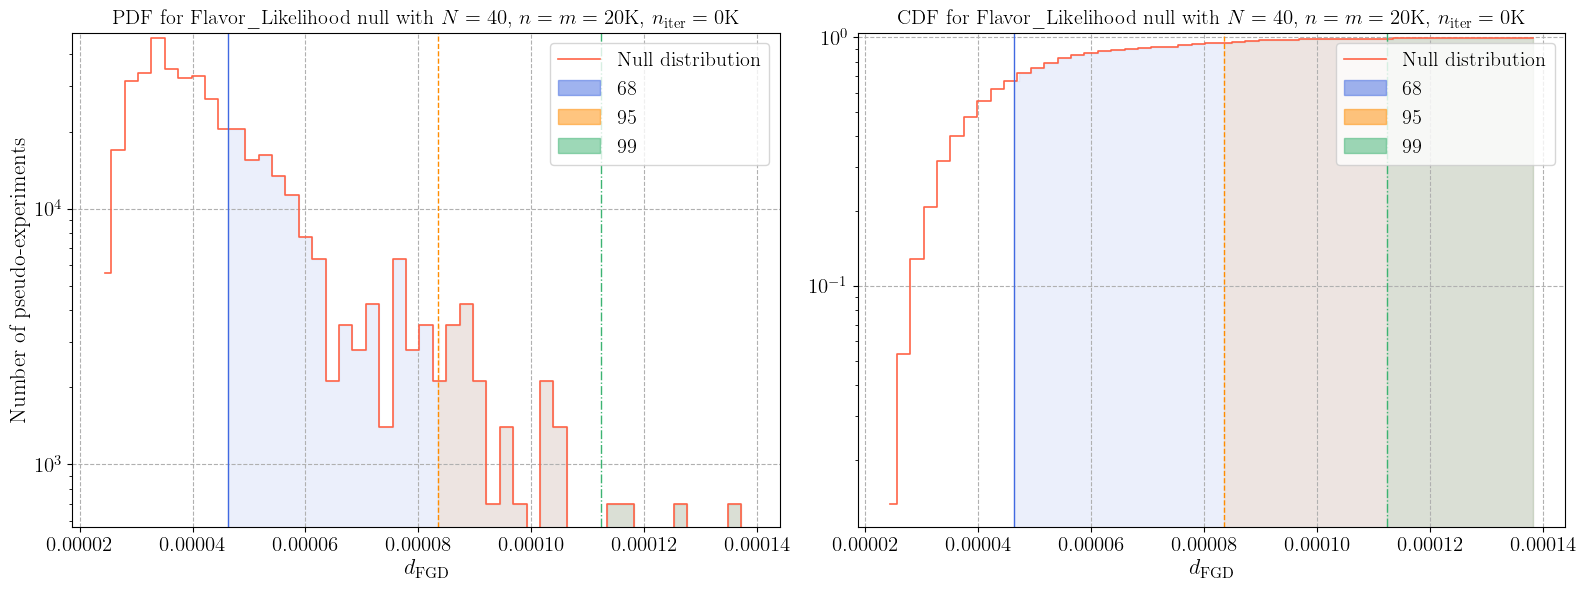

Time elapsed: 6.562761838547885 seconds.
mu = 2203.412399088542 +/- 20449828.760611292
sigma = 22381.163015086993 +/- 2264.9650427353386
68%CL = 3796.02197265625, 95%CL = 38027.22265625, 99%CL = 87892.62890625
mu = 2203.412399088542 +/- 20449828.760611292
sigma = 22381.163015086993 +/- 2264.9650427353386


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


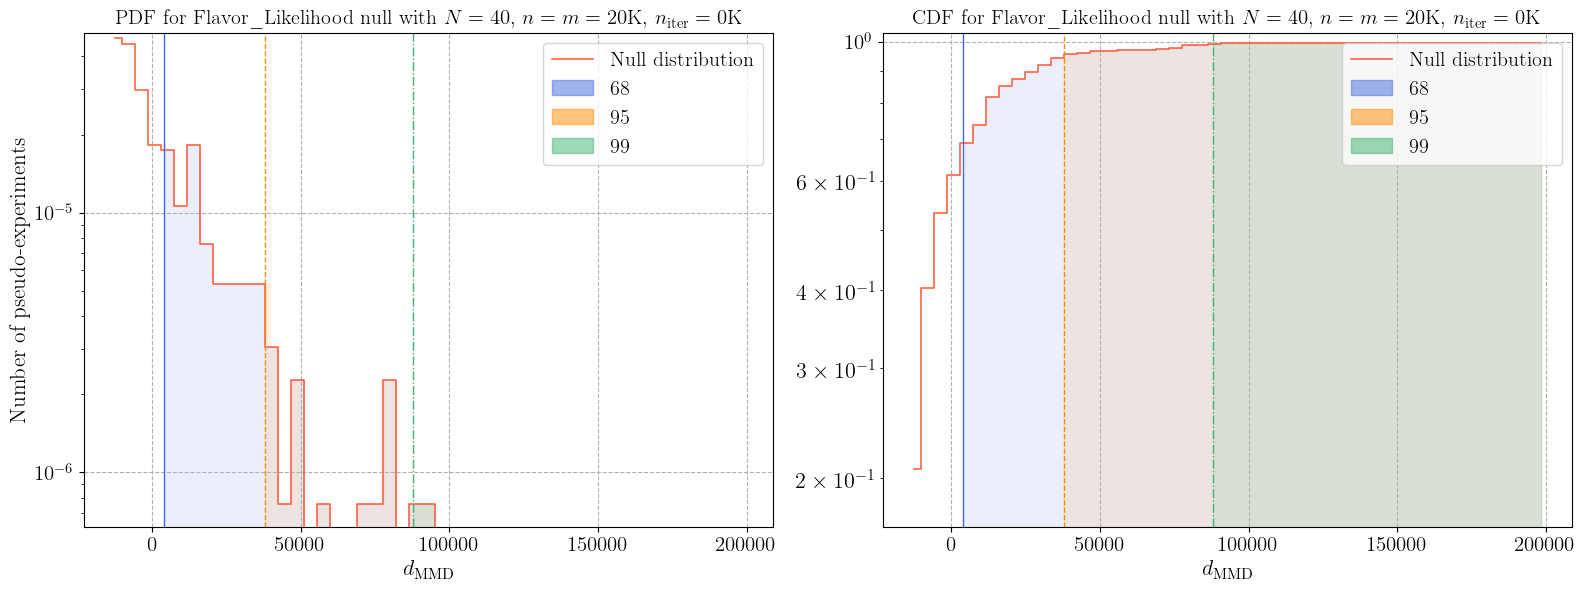

Time elapsed: 3.107821688055992 seconds.
mu = 0.8636884012725204 +/- 0.00016385459096814563
sigma = 0.06335299044910239 +/- 0.0018474497360985477
68%CL = 0.8962505497038364, 95%CL = 0.9610002487897873, 99%CL = 1.0178757831454277
mu = 0.8636884012725204 +/- 0.00016385459096814563
sigma = 0.06335299044910239 +/- 0.0018474497360985477


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


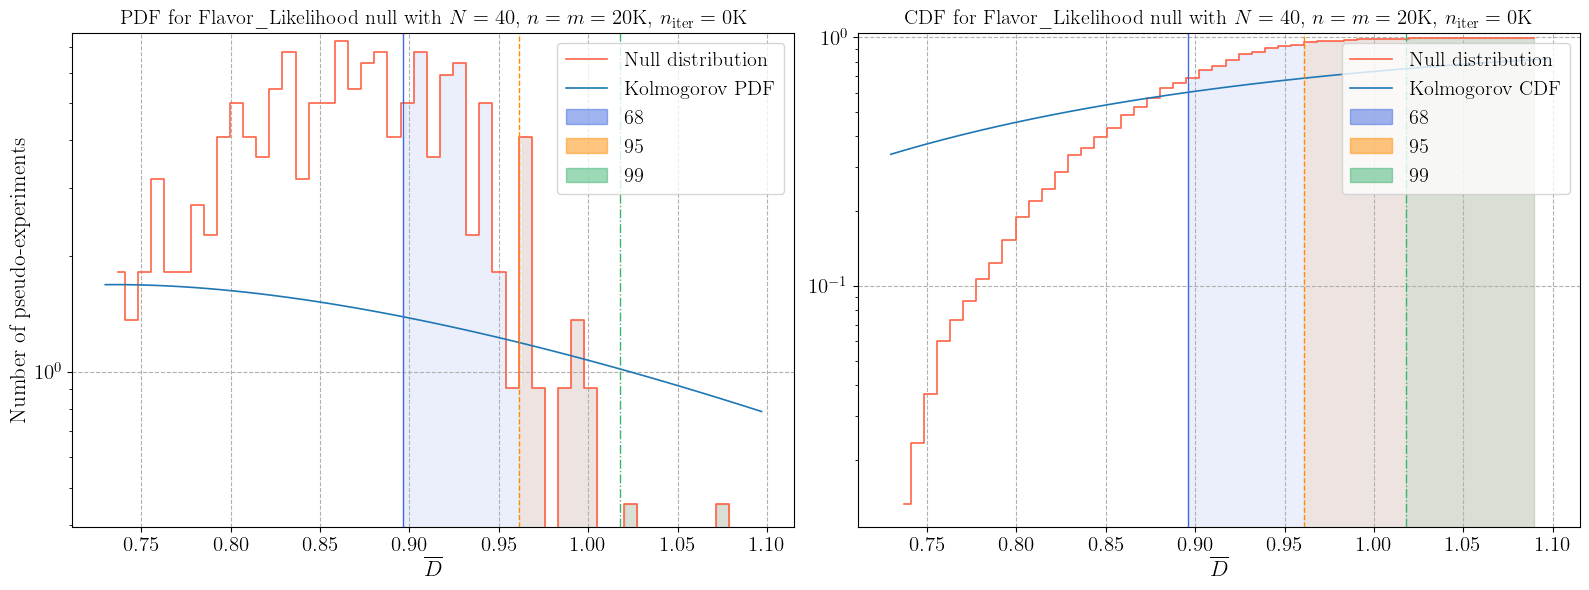

Time elapsed: 2.2762240851297975 seconds.
mu = 0.877320166832457 +/- 0.0006486970990457071
sigma = 0.12605462666184303 +/- 0.004273997524496126
68%CL = 0.9156507439911366, 95%CL = 1.1124505661427975, 99%CL = 1.2390006333589554
mu = 0.877320166832457 +/- 0.0006486970990457071
sigma = 0.12605462666184303 +/- 0.004273997524496126


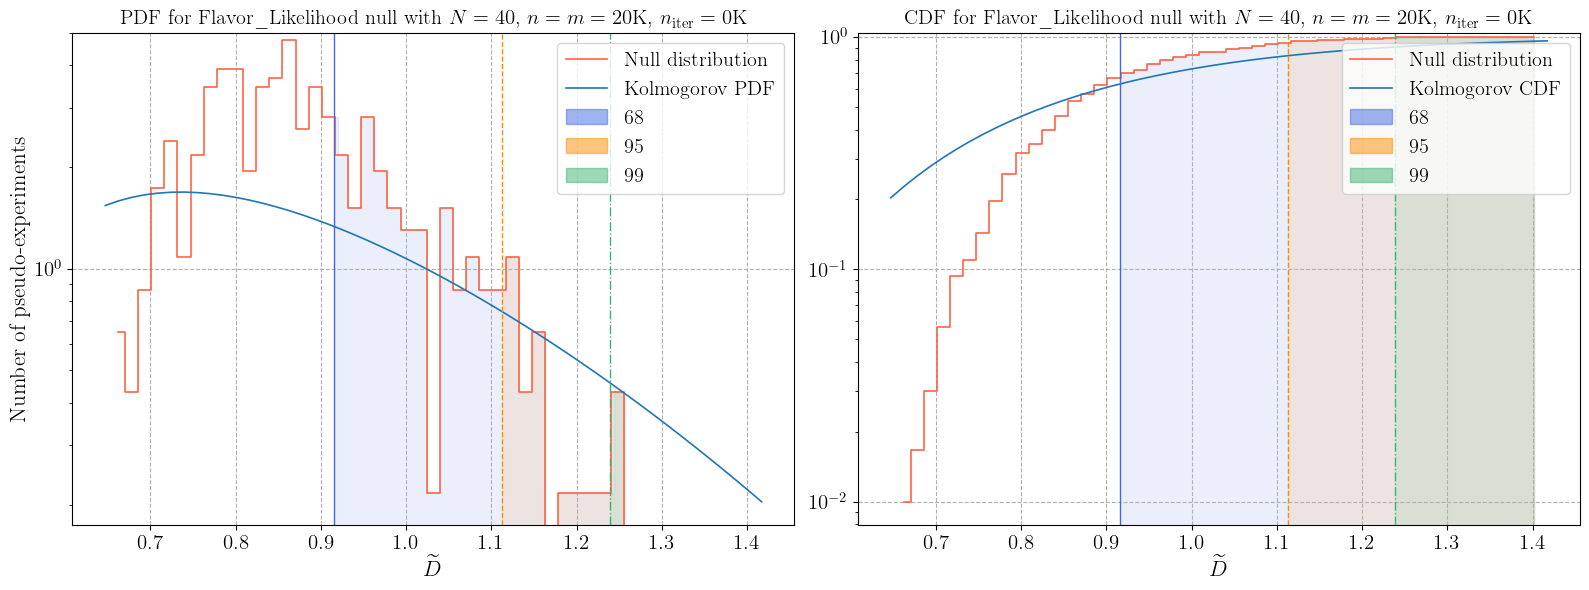

Time elapsed: 3.8511783620342612 seconds.
mu = 0.015270765361945804 +/- 3.816227879054324e-07
sigma = 0.003057419017057814 +/- 0.0001208919564459373
68%CL = 0.016088457607808387, 95%CL = 0.021466707962708, 99%CL = 0.02425266125560707
mu = 0.015270765361945804 +/- 3.816227879054324e-07
sigma = 0.003057419017057814 +/- 0.0001208919564459373


/tmp/ipykernel_21054/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_21054/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_21054/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_21054/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


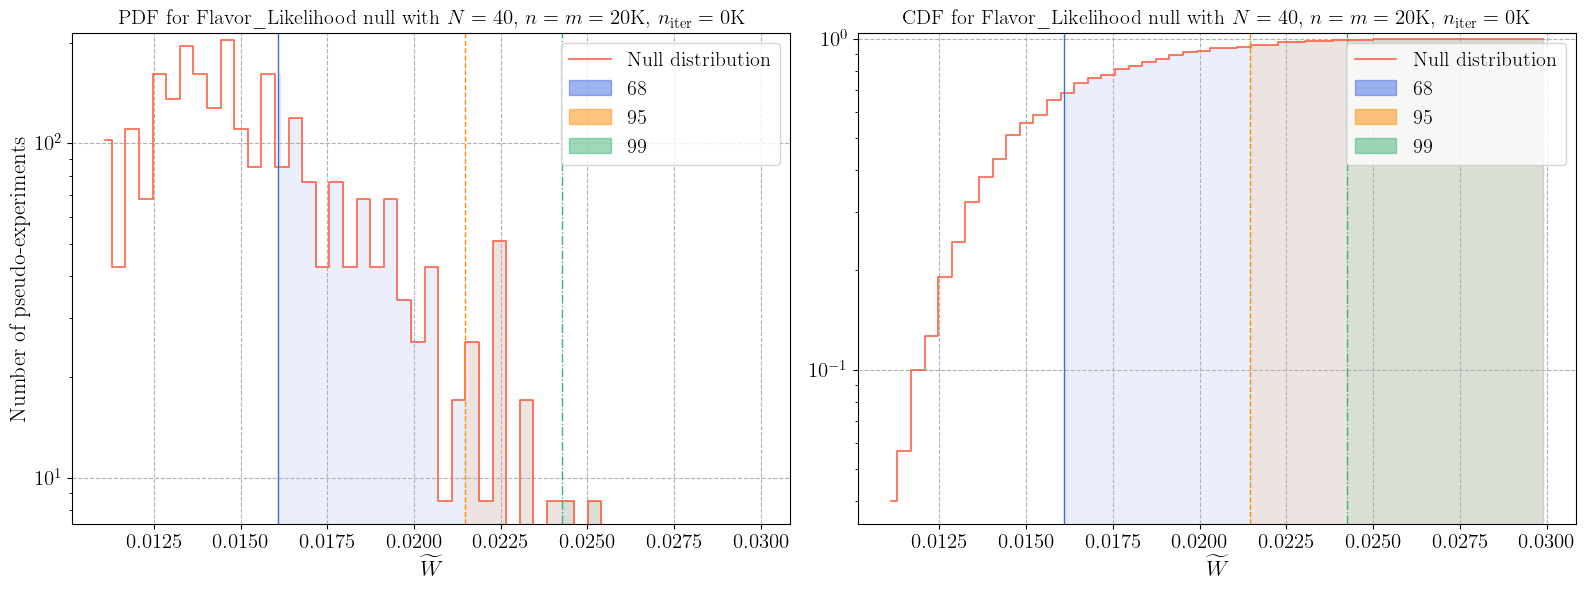

Time elapsed: 1.5522675961256027 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f4b88403d90>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f4b884032e0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f4b88403eb0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f4b88403520>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f4b883e9120>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            100  $d_{\mathrm{FGD}}$   
1              4  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            100     $\widetilde{D}$   
4            100     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
1  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
2  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
3  results/EW_MsplineN/run_2/tests/20K/null_hypot...   
4  results/EW_MsplineN/run_2/tests/20K/null_hypot...   

                                          thresholds  \
0  [[0.68, [408, 191], 4.635309012620329e-05], [0...   
1  [[0.68, [408, 191], 3796.02197265625], [0.95, ...   
2  [[0.68, [408, 191], 0.8962505497038364], [0.95...   
3  [[0.68, [408, 191], 0.9156507439911366], [0.95...   
4  [[0.68, [408, 191], 0.016088457607808387], [0....   

                                         null_figure  
0  results/EW_MsplineN/run_2/tests/20K/null_hypot...  
1  results/EW_MsplineN/run_2/tests/20K/null_hypot...  
2  results/EW_MsplineN/run_2/tests/20K/null_hypot...  
3  results/EW_MsplineN/run_2/tests/20K/null_hypot...  
4  results/EW_MsplineN/run_2/tests/20K/null_hypot...

In [30]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [31]:
#l = len(dataset) // 2
l = 2_000_000
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 2000000 samples for dist_1_alt.


In [32]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(100_000, seed = 0).numpy(),means,stds)
for i in range(1,20):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(100_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6


i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19


In [33]:
niter_alt = 100

TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter_alt*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter_alt*batch_size_test],
                                                      niter = niter_alt,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [34]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 100
batch_size = 20000


FGD metric calculation completed in 54.55220898799598 seconds.
Thresholds for metric fgd: [[0.68, [408, 191], 4.635309012620329e-05], [0.95, [570, 30], 8.345693822306816e-05], [0.99, [594, 6], 0.00011231466100036058]]
Value of the test-statistic for the alternative hypothesis: 7.214032523121565e-05

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 100
batch_size = 20000
nchunks = 25
Iterating from 0 to 4 out of 100 .
Iterating from 4 to 8 out of 100 .
Iterating from 8 to 12 out of 100 .
Iterating from 12 to 16 out of 100 .
Iterating from 16 to 20 out of 100 .
Iterating from 20 to 24 out of 100 .
Iterating from 24 to 28 out of 100 .
Iterating from 28 to 32 out of 100 .
Iterating from 32 to 36 out of 100 .
Iterating from 36 to 40 out of 100 .
Iterating from 40 to 44 out of 100 .
Iterating from 44 to 48 out of 100 .
Iterating from 48 to 52 out of 100 .
Iterating from 52 to 56 out of 100 .
Iterating from 56 to 60 out of 100

## 50K

### Bootstrapping Null Hypothesis

In [35]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '50K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '50K', "metrics_config.json")

In [36]:
niter_tot = 1_000
batch_size_test = 50_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [37]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 20, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 2, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 10_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 60,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 60,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [38]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 20

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 50000
nchunks = 6
Iterating from 0 to 20 out of 120 .


Iterating from 20 to 40 out of 120 .
Iterating from 40 to 60 out of 120 .
Iterating from 60 to 80 out of 120 .
Iterating from 80 to 100 out of 120 .
Iterating from 100 to 120 out of 120 .
FGD metric calculation completed in 167.10230526141822 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 50000
nchunks = 6
Iterating from 0 to 20 out of 120 .
Iterating from 20 to 40 out of 120 .
Iterating from 40 to 60 out of 120 .
Iterating from 60 to 80 out of 120 .
Iterating from 80 to 100 out of 120 .
Iterating from 100 to 120 out of 120 .
FGD metric calculation completed in 159.66066175885499 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 50000
nchunks = 6
Iterating from 0 to 20 out of 120 .
Iterating from 20 to 40 out of 120 .
I

ResourceExhaustedError: Graph execution error:

Detected at node 'MatMul/pfor/MatMul' defined at (most recent call last):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_21054/3677327191.py", line 25, in <module>
      obj.Test_tf(max_vectorize = max_vectorize)
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 536, in Test_tf
      vals_list: DataType = compute_test(seed_generator = seed_generator,
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 519, in compute_test
      _, res = tf.while_loop(cond, body, [0, res])
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 511, in body
      chunk_result: DataTypeTF = batched_test(start, end, seed_generator = seed_generator) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 476, in batched_test
      vals_list: DataTypeTF = batched_test_sub(dist_1_k, dist_2_k) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 451, in batched_test_sub
      vals_list: DataTypeTF = tf.vectorized_map(loop_body, tf.range(tf.shape(dist_1_k_replica)[0])) # type: ignore
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
Node: 'MatMul/pfor/MatMul'
OOM when allocating tensor with shape[2,10000,10000] and type double on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node MatMul/pfor/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_batched_test_736475]

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 1.6223916557707935e-05], [0.95, [912, 48], 2.2939597129893995e-05], [0.99, [950, 9], 2.761572431339199e-05]]
Computing time for metric fgd: 1243.2273190822452
ThresholdS for metric mmd: [[0.68, [652, 307], 168.1318359375], [0.95, [912, 48], 16926.479125976562], [0.99, [950, 9], 32087.897583007812]]
Computing time for metric mmd: 7078.206355500035
ThresholdS for metric ks: [[0.68, [652, 307], 0.8908147600962165], [0.95, [912, 48], 0.9754838098560775], [0.99, [950, 9], 1.025527695052633]]
Computing time for metric ks: 42.30258104298264
ThresholdS for metric sks: [[0.68, [897, 422], 0.8986252109899795], [0.95, [1254, 66], 1.0997772734984013], [0.99, [1306, 13], 1.174091658882259]]
Computing time for metric sks: 204.62062643654644
ThresholdS for metric swd: [[0.68, [652, 307], 0.01593589512031743], [0.95, [912, 48], 0.020445007489415155], [0.99, [950, 9], 0.023867336343494763]]
Computing time for metric swd: 76.23533327318728


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f9dec4d8280>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9dec4dab00>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9dec4da5f0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9dec4da830>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9dec4dbc70>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0             20  $d_{\mathrm{FGD}}$   
1              2  $d_{\mathrm{MMD}}$   
2          10000      $\overline{D}$   
3             60     $\widetilde{D}$   
4             60     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
1  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
2  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
3  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
4  results/EW_MsplineN/run_1/tests/50K/null_hypot...   

                                          thresholds  
0  [[0.68, [652, 307], 1.6223916557707935e-05], [...  
1  [[0.68, [652, 307], 168.1318359375], [0.95, [9...  
2  [[0.68, [652, 307], 0.8908147600962165], [0.95...  
3  [[0.68, [897, 422], 0.8986252109899795], [0.95...  
4  [[0.68, [652, 307], 0.01593589512031743], [0.9...

#### Plots of null-distributions

mu = 1.5546625267233453e-05 +/- 4.654284914738174e-13
sigma = 3.7974694693477504e-06 +/- 2.856123728109923e-07
68%CL = 1.6223916557707935e-05, 95%CL = 2.2939597129893995e-05, 99%CL = 2.761572431339199e-05
mu = 1.5546625267233453e-05 +/- 4.654284914738174e-13
sigma = 3.7974694693477504e-06 +/- 2.856123728109923e-07


/tmp/ipykernel_76966/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_76966/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_76966/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_76966/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


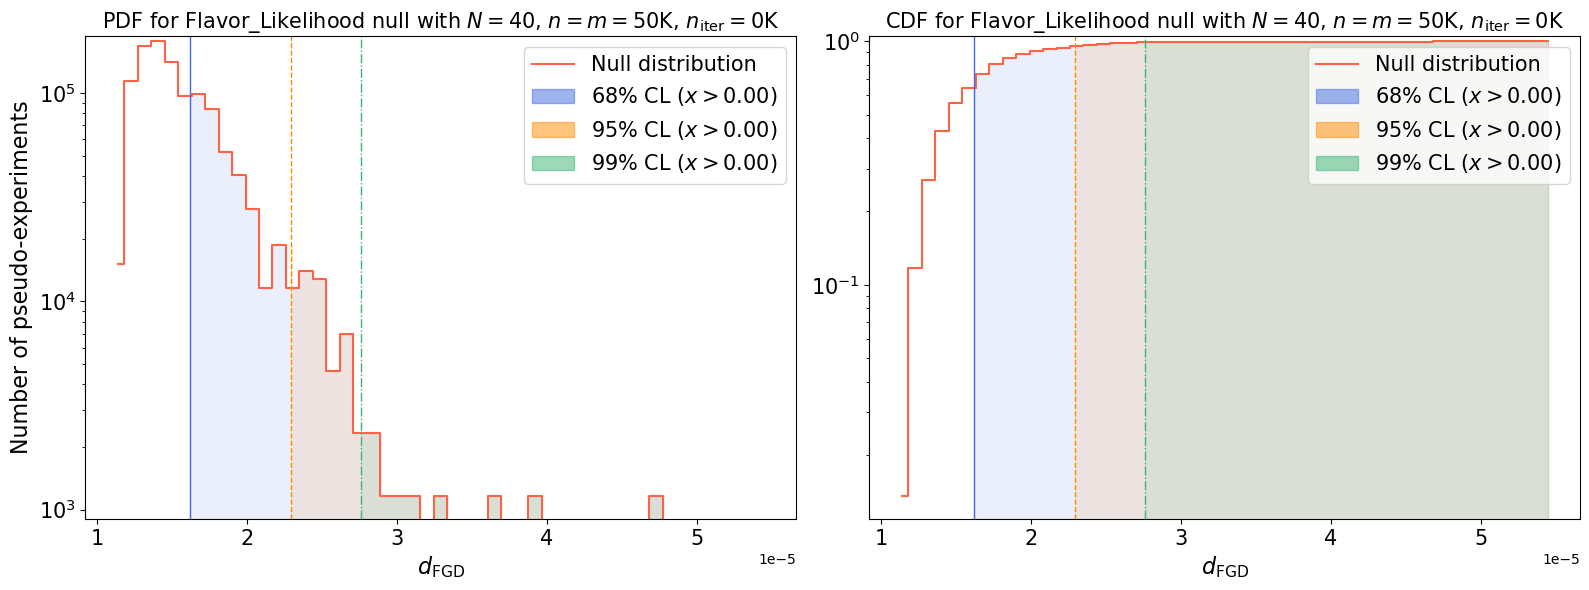

Time elapsed: 1.3340215617790818 seconds.
mu = 242.70957686106365 +/- 2127462.1755240364
sigma = 8118.928784262512 +/- 432.3856501206582
68%CL = 168.1318359375, 95%CL = 16926.479125976562, 99%CL = 32087.897583007812
mu = 242.70957686106365 +/- 2127462.1755240364
sigma = 8118.928784262512 +/- 432.3856501206582


/tmp/ipykernel_76966/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_76966/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_76966/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


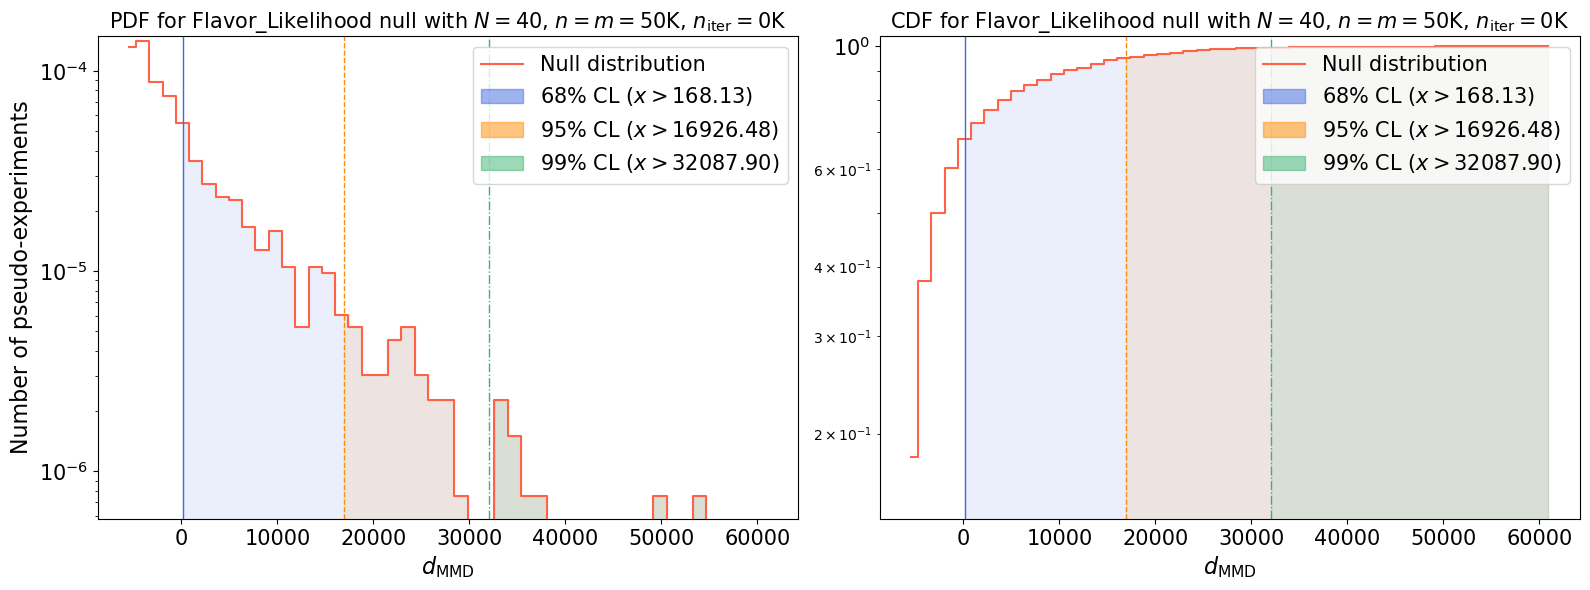

Time elapsed: 1.243006338365376 seconds.
mu = 0.8649764788525041 +/- 0.00012534971284450851
sigma = 0.06232029205956361 +/- 0.0014532091239083068
68%CL = 0.8908147600962165, 95%CL = 0.9754838098560775, 99%CL = 1.025527695052633
mu = 0.8649764788525041 +/- 0.00012534971284450851
sigma = 0.06232029205956361 +/- 0.0014532091239083068


/tmp/ipykernel_76966/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_76966/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_76966/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_76966/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


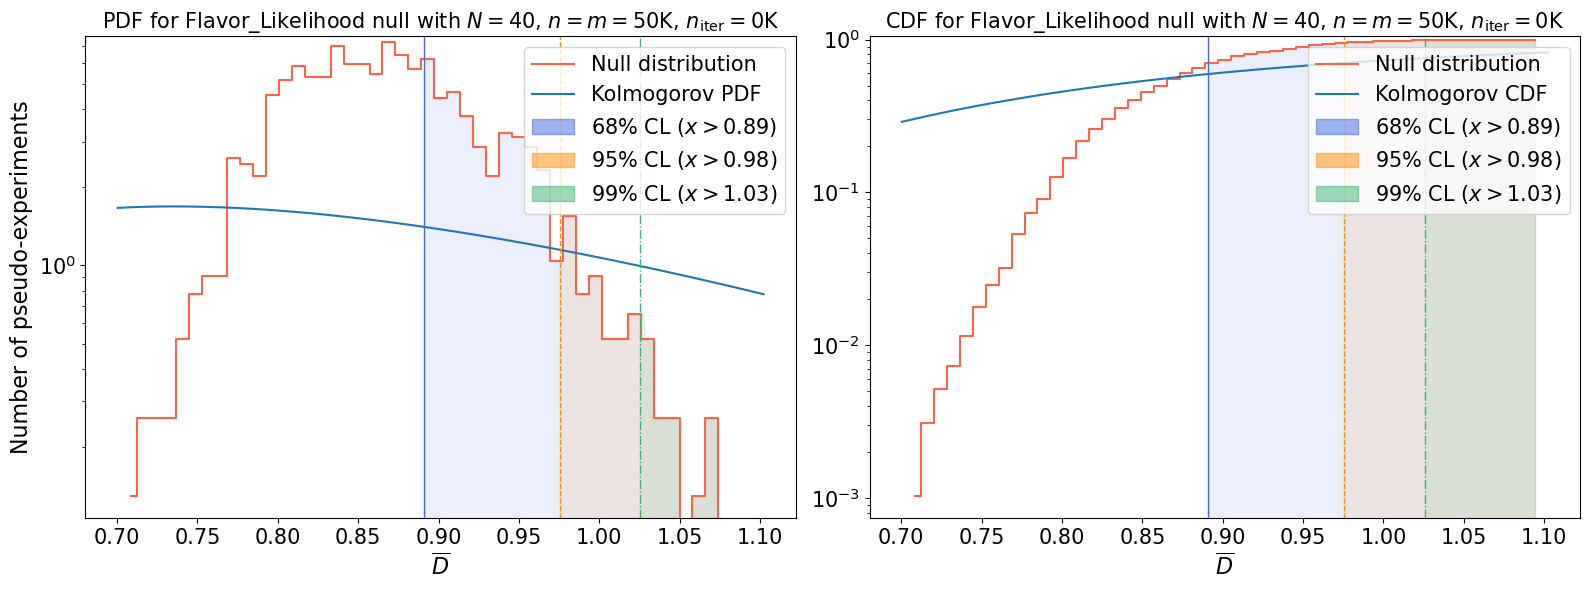

Time elapsed: 1.5244912318885326 seconds.
mu = 0.8667828900852538 +/- 0.0003725374328448704
sigma = 0.11633983447473228 +/- 0.002641096865814094
68%CL = 0.8986252109899795, 95%CL = 1.0997772734984013, 99%CL = 1.174091658882259
mu = 0.8667828900852538 +/- 0.0003725374328448704
sigma = 0.11633983447473228 +/- 0.002641096865814094


/tmp/ipykernel_76966/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_76966/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_76966/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_76966/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


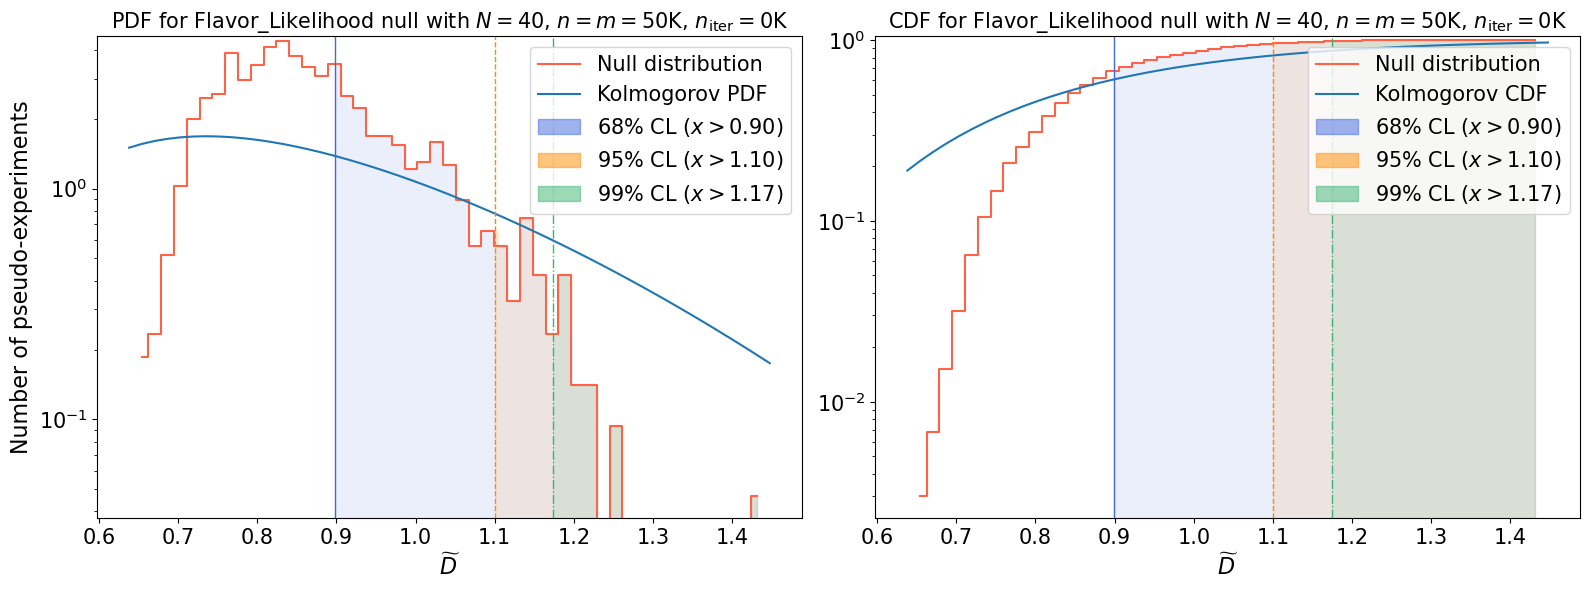

Time elapsed: 1.1376196285709739 seconds.
mu = 0.015113071546371159 +/- 2.547389388113181e-07
sigma = 0.0028094122768248667 +/- 9.260004088955506e-05
68%CL = 0.01593589512031743, 95%CL = 0.020445007489415155, 99%CL = 0.023867336343494763
mu = 0.015113071546371159 +/- 2.547389388113181e-07
sigma = 0.0028094122768248667 +/- 9.260004088955506e-05


/tmp/ipykernel_76966/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_76966/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_76966/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_76966/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


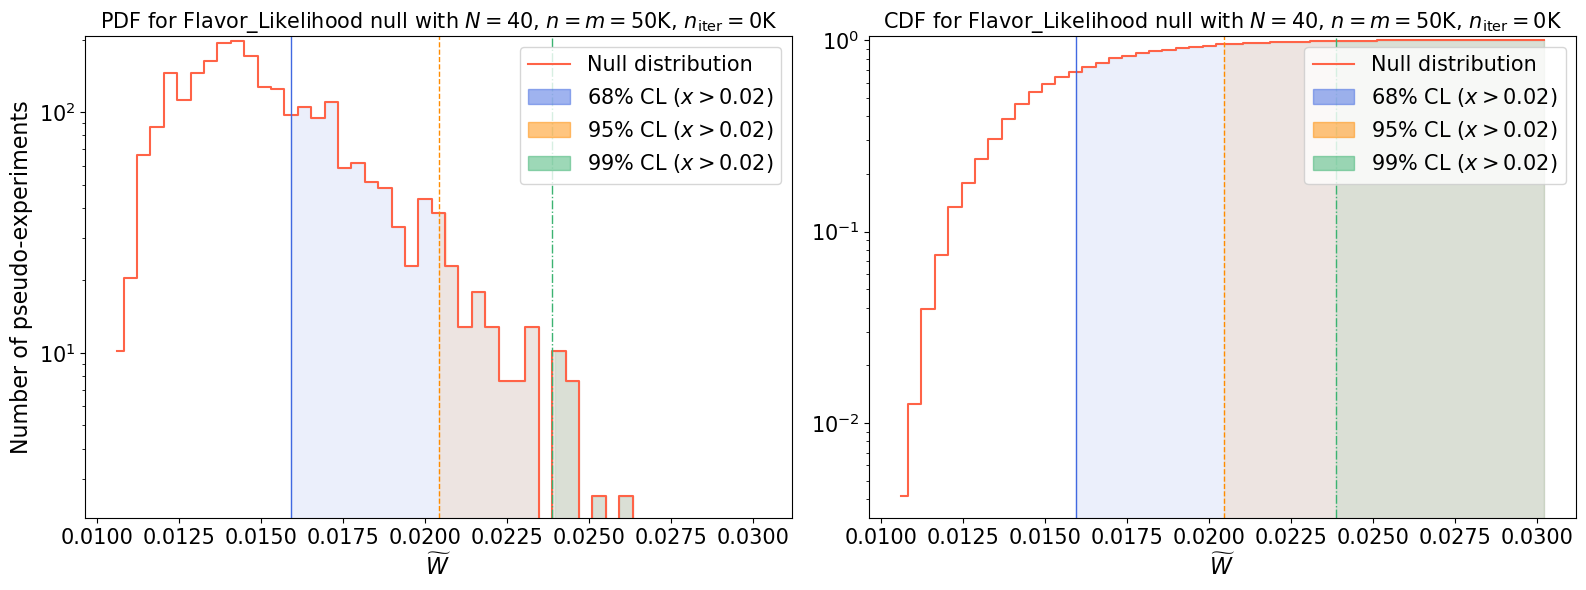

Time elapsed: 0.9052117206156254 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f9dec4d8280>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9dec4dab00>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9dec4da5f0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9dec4da830>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9dec4dbc70>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0             20  $d_{\mathrm{FGD}}$   
1              2  $d_{\mathrm{MMD}}$   
2          10000      $\overline{D}$   
3             60     $\widetilde{D}$   
4             60     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
1  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
2  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
3  results/EW_MsplineN/run_1/tests/50K/null_hypot...   
4  results/EW_MsplineN/run_1/tests/50K/null_hypot...   

                                          thresholds  \
0  [[0.68, [652, 307], 1.6223916557707935e-05], [...   
1  [[0.68, [652, 307], 168.1318359375], [0.95, [9...   
2  [[0.68, [652, 307], 0.8908147600962165], [0.95...   
3  [[0.68, [897, 422], 0.8986252109899795], [0.95...   
4  [[0.68, [652, 307], 0.01593589512031743], [0.9...   

                                         null_figure  
0  results/EW_MsplineN/run_1/tests/50K/null_hypot...  
1  results/EW_MsplineN/run_1/tests/50K/null_hypot...  
2  results/EW_MsplineN/run_1/tests/50K/null_hypot...  
3  results/EW_MsplineN/run_1/tests/50K/null_hypot...  
4  results/EW_MsplineN/run_1/tests/50K/null_hypot...

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [ ]:
#l = len(dataset) // 2
l = 6_000_000
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 6000000 samples for dist_1_alt.


In [ ]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(50_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(50_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=50


i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [ ]:
niter_alt = 120

TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter_alt*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter_alt*batch_size_test],
                                                      niter = niter_alt,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...


niter = 120
batch_size = 50000
nchunks = 6
Iterating from 0 to 20 out of 120 .
Iterating from 20 to 40 out of 120 .
Iterating from 40 to 60 out of 120 .
Iterating from 60 to 80 out of 120 .
Iterating from 80 to 100 out of 120 .
Iterating from 100 to 120 out of 120 .
FGD metric calculation completed in 141.70105425361544 seconds.
Thresholds for metric fgd: [[0.68, [652, 307], 1.6223916557707935e-05], [0.95, [912, 48], 2.2939597129893995e-05], [0.99, [950, 9], 2.761572431339199e-05]]
Value of the test-statistic for the alternative hypothesis: 6.35727002622378e-05

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 120
batch_size = 50000
nchunks = 60
Iterating from 0 to 2 out of 120 .
Iterating from 2 to 4 out of 120 .
Iterating from 4 to 6 out of 120 .
Iterating from 6 to 8 out of 120 .
Iterating from 8 to 10 out of 120 .
Iterating from 10 to 12 out of 120 .
Iterating from 12 to 14 out of 120 .
Iterating from 14 to 16 out o

## 100K

### Bootstrapping Null Hypothesis

In [ ]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '100K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '100K', "metrics_config.json")

In [ ]:
niter_tot = 1_000
batch_size_test = 100_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 60, nbootstrap: 16
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 6, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 250,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/EW_MsplineN/run_1/tests/100K/null_hypotheses/FGD.json
Loading mmd from results/EW_MsplineN/run_1/tests/100K/null_hypotheses/MMD.json
Computing and savng ks with max_vectorize = 250

Testing from 0 to 60 of 960 samples.

------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 60
batch_size = 100000


nchunks = 10
Iterating from 0 to 6 out of 60 .
Iterating from 6 to 12 out of 60 .
Iterating from 12 to 18 out of 60 .
Iterating from 18 to 24 out of 60 .
Iterating from 24 to 30 out of 60 .
Iterating from 30 to 36 out of 60 .
Iterating from 36 to 42 out of 60 .
Iterating from 42 to 48 out of 60 .
Iterating from 48 to 54 out of 60 .
Iterating from 54 to 60 out of 60 .
KS tests calculation completed in 8.828279718756676 seconds.

Testing from 60 to 120 of 960 samples.

------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 60
batch_size = 100000
nchunks = 10
Iterating from 0 to 6 out of 60 .
Iterating from 6 to 12 out of 60 .
Iterating from 12 to 18 out of 60 .
Iterating from 18 to 24 out of 60 .
Iterating from 24 to 30 out of 60 .
Iterating from 30 to 36 out of 60 .
Iterating from 36 to 42 out of 60 .
Iterating from 42 to 48 out of 60 .
Iterating from 48 to 54 out of 60 .
Iterating from 54 to 60 out of 60 .
KS tests calculation complet

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 1.021622037921622e-05], [0.95, [912, 48], 1.2674806191292355e-05], [0.99, [950, 9], 1.4899036113828183e-05]]
Computing time for metric fgd: 4107.311259644106
ThresholdS for metric mmd: [[0.68, [693, 326], -208.68130493164062], [0.95, [969, 51], 7700.098205566406], [0.99, [1009, 10], 15552.414779663086]]
Computing time for metric mmd: 22468.388156467117
ThresholdS for metric ks: [[0.68, [897, 422], 0.8951555464128067], [0.95, [1254, 66], 0.9857152710128189], [0.99, [1306, 13], 1.0394370596500913]]
Computing time for metric ks: 185.49250469077379
ThresholdS for metric sks: [[0.68, [652, 307], 0.9074872194067829], [0.95, [912, 48], 1.0899498814846613], [0.99, [950, 9], 1.2424497333838154]]
Computing time for metric sks: 240.60818201862276
ThresholdS for metric swd: [[0.68, [652, 307], 0.015997195177663882], [0.95, [912, 48], 0.020661345722746898], [0.99, [950, 9], 0.026085384280238284]]
Computing time for metric swd: 81.08043263759464


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f148d18d120>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f12745930a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f1274591e10>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f12745904c0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f12745905e0>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0              6  $d_{\mathrm{FGD}}$   
1              1  $d_{\mathrm{MMD}}$   
2            250      $\overline{D}$   
3             20     $\widetilde{D}$   
4             20     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
1  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
2  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
3  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
4  results/EW_MsplineN/run_1/tests/100K/null_hypo...   

                                          thresholds  
0  [[0.68, [652, 307], 1.021622037921622e-05], [0...  
1  [[0.68, [693, 326], -208.68130493164062], [0.9...  
2  [[0.68, [897, 422], 0.8951555464128067], [0.95...  
3  [[0.68, [652, 307], 0.9074872194067829], [0.95...  
4  [[0.68, [652, 307], 0.015997195177663882], [0....

#### Plots of null-distributions

mu = 1.0025520222971795e-05 +/- 5.817786198448512e-14
sigma = 1.3426001358077226e-06 +/- 6.759291588851305e-08
68%CL = 1.021622037921622e-05, 95%CL = 1.2674806191292355e-05, 99%CL = 1.4899036113828183e-05
mu = 1.0025520222971795e-05 +/- 5.817786198448512e-14
sigma = 1.3426001358077226e-06 +/- 6.759291588851305e-08


/tmp/ipykernel_68392/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_68392/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_68392/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_68392/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


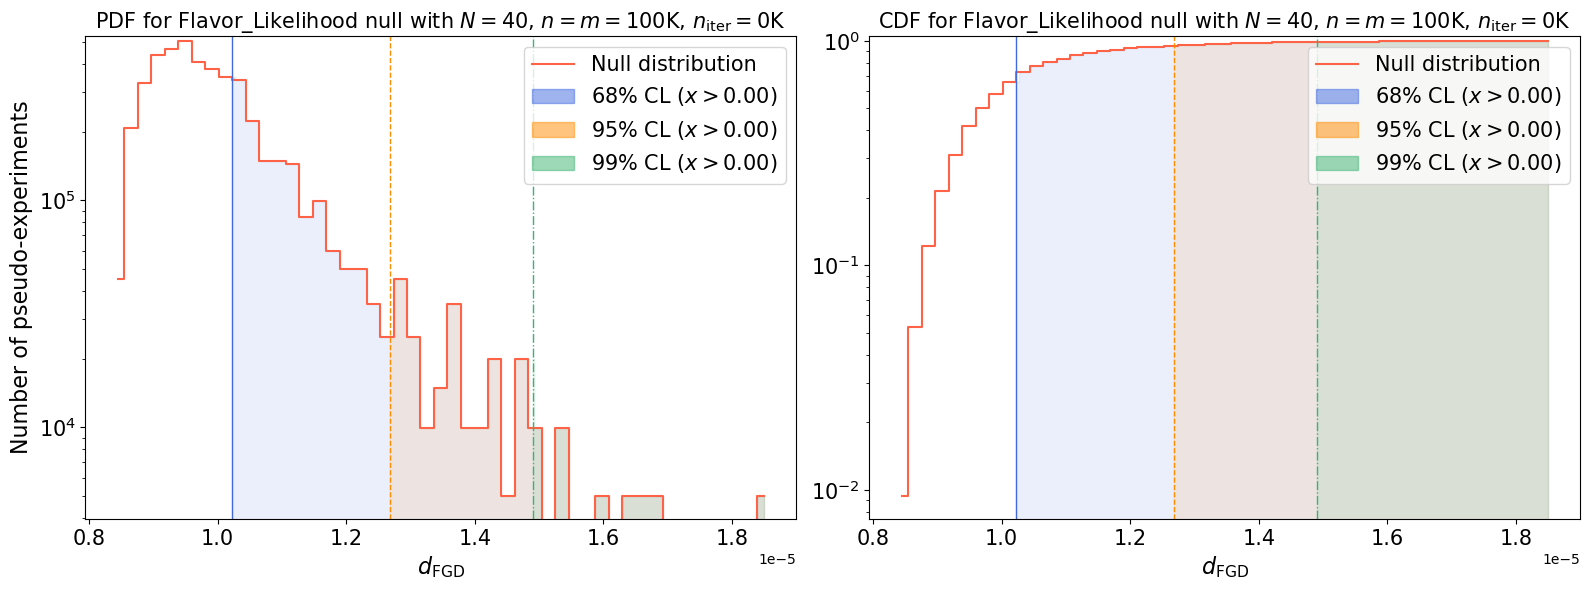

Time elapsed: 1.424954304471612 seconds.
mu = -71.6075652029 +/- 467106.4633437313
sigma = 3862.406517613688 +/- 209.65083824347565
68%CL = -208.68130493164062, 95%CL = 7700.098205566406, 99%CL = 15552.414779663086
mu = -71.6075652029 +/- 467106.4633437313
sigma = 3862.406517613688 +/- 209.65083824347565


/tmp/ipykernel_68392/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_68392/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_68392/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


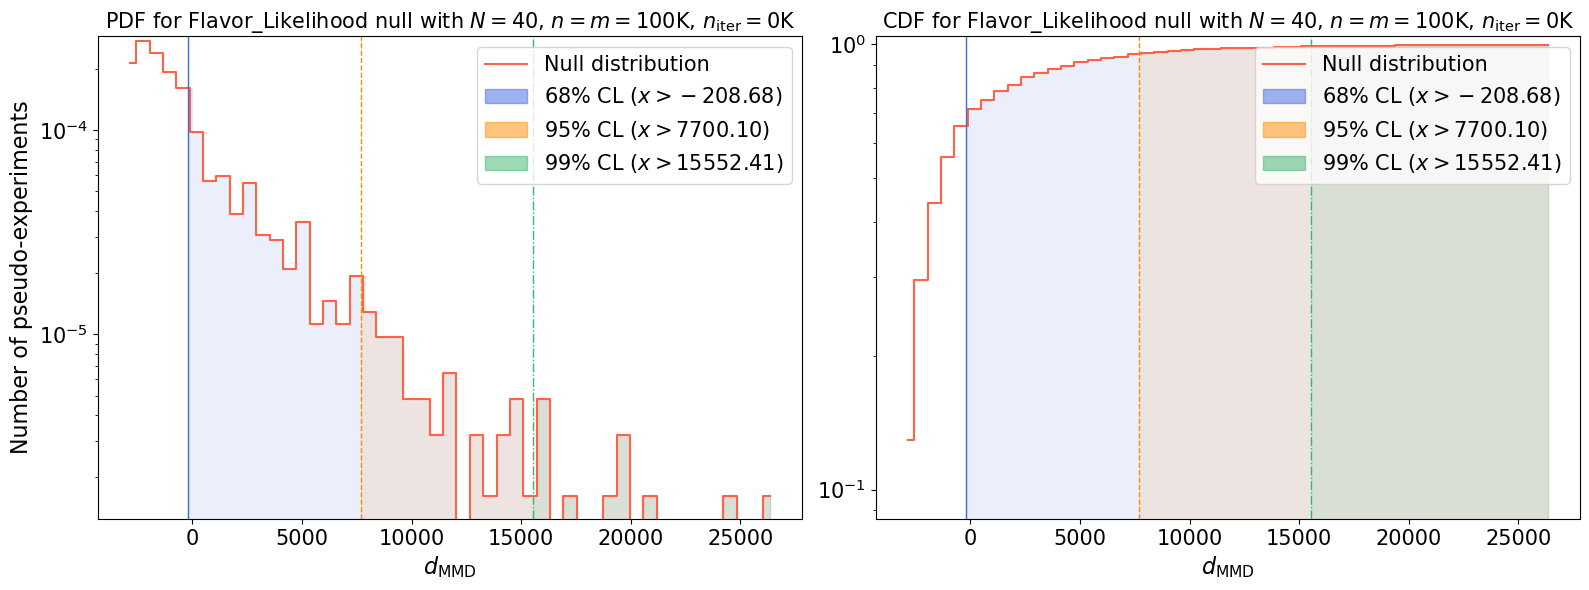

Time elapsed: 1.1485122991725802 seconds.
mu = 0.8679496120853473 +/- 0.0001194156734952463
sigma = 0.06586795027714218 +/- 0.0013114234086725705
68%CL = 0.8951555464128067, 95%CL = 0.9857152710128189, 99%CL = 1.0394370596500913
mu = 0.8679496120853473 +/- 0.0001194156734952463
sigma = 0.06586795027714218 +/- 0.0013114234086725705


/tmp/ipykernel_68392/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_68392/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_68392/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_68392/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


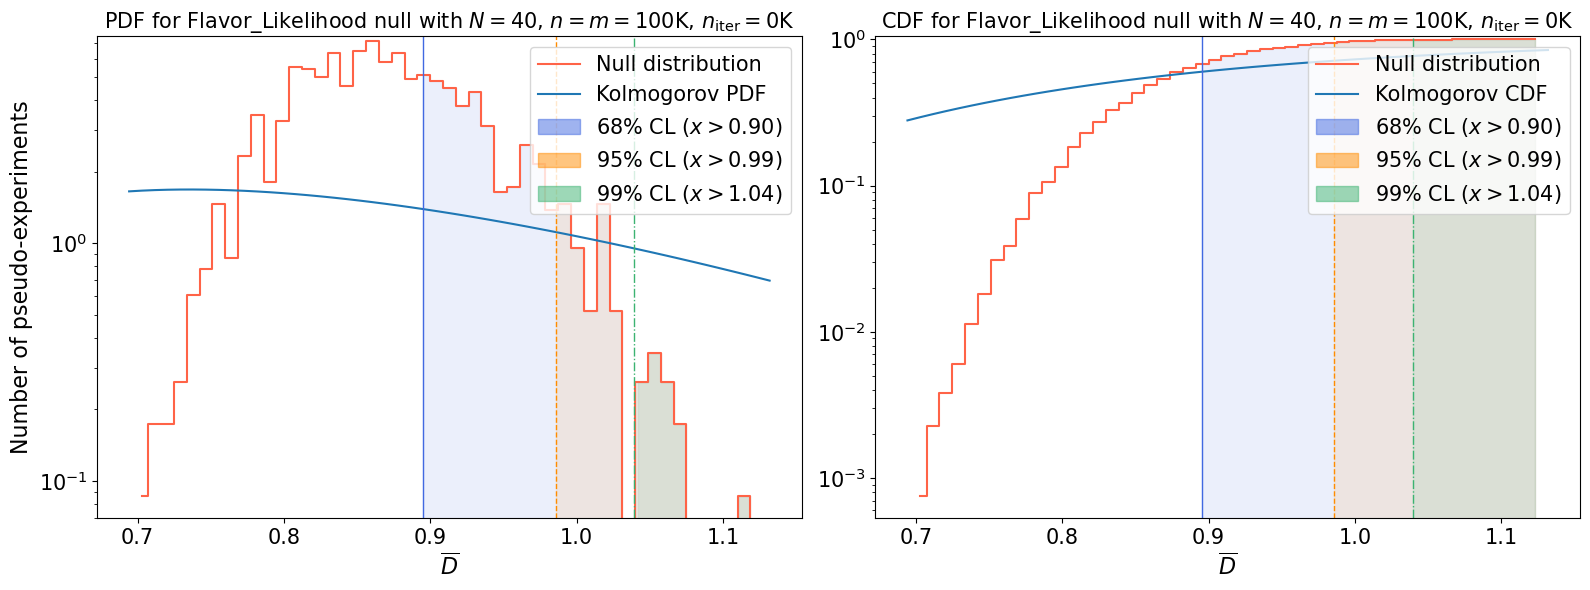

Time elapsed: 1.6375370947644114 seconds.
mu = 0.8695810227389124 +/- 0.00046282975951348455
sigma = 0.11975080628454772 +/- 0.003412931348136471
68%CL = 0.9074872194067829, 95%CL = 1.0899498814846613, 99%CL = 1.2424497333838154
mu = 0.8695810227389124 +/- 0.00046282975951348455
sigma = 0.11975080628454772 +/- 0.003412931348136471


/tmp/ipykernel_68392/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_68392/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_68392/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_68392/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


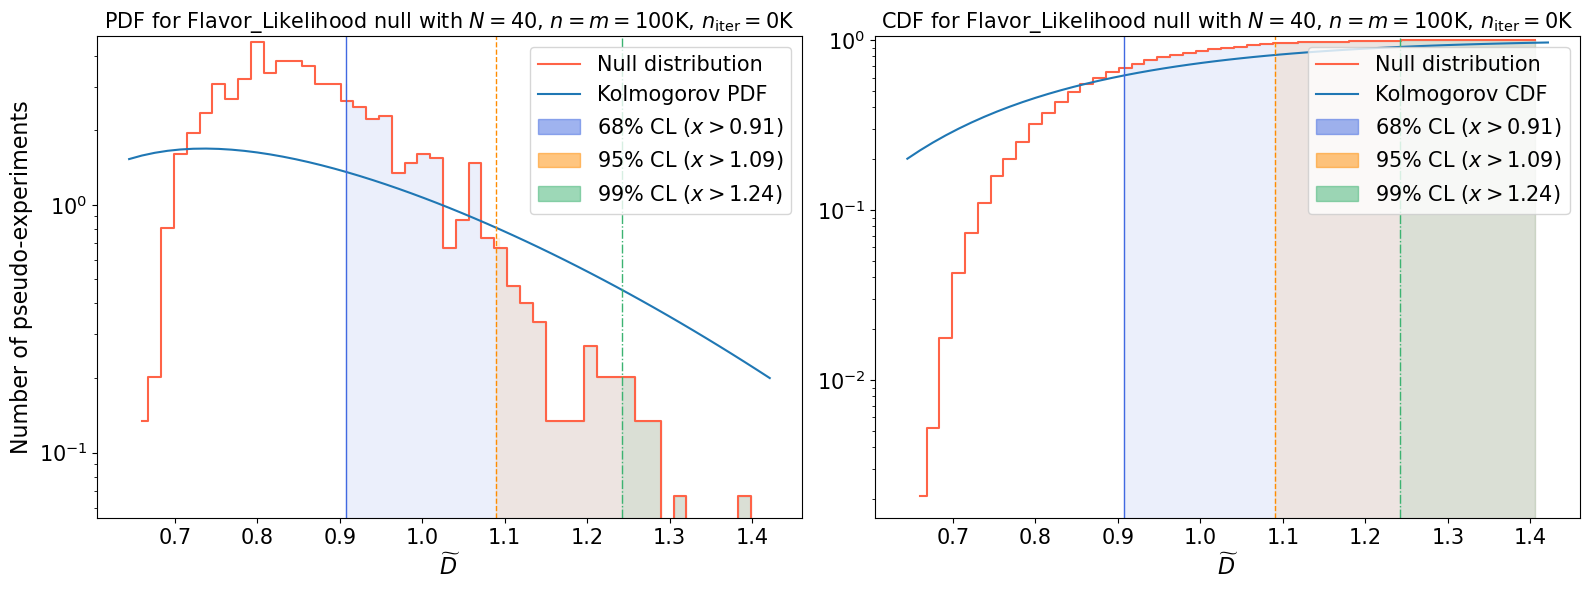

Time elapsed: 1.5973313972353935 seconds.
mu = 0.015137422407651651 +/- 2.7894216182172655e-07
sigma = 0.0029398480876271704 +/- 9.692254196707014e-05
68%CL = 0.015997195177663882, 95%CL = 0.020661345722746898, 99%CL = 0.026085384280238284
mu = 0.015137422407651651 +/- 2.7894216182172655e-07
sigma = 0.0029398480876271704 +/- 9.692254196707014e-05


/tmp/ipykernel_68392/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_68392/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_68392/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_68392/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


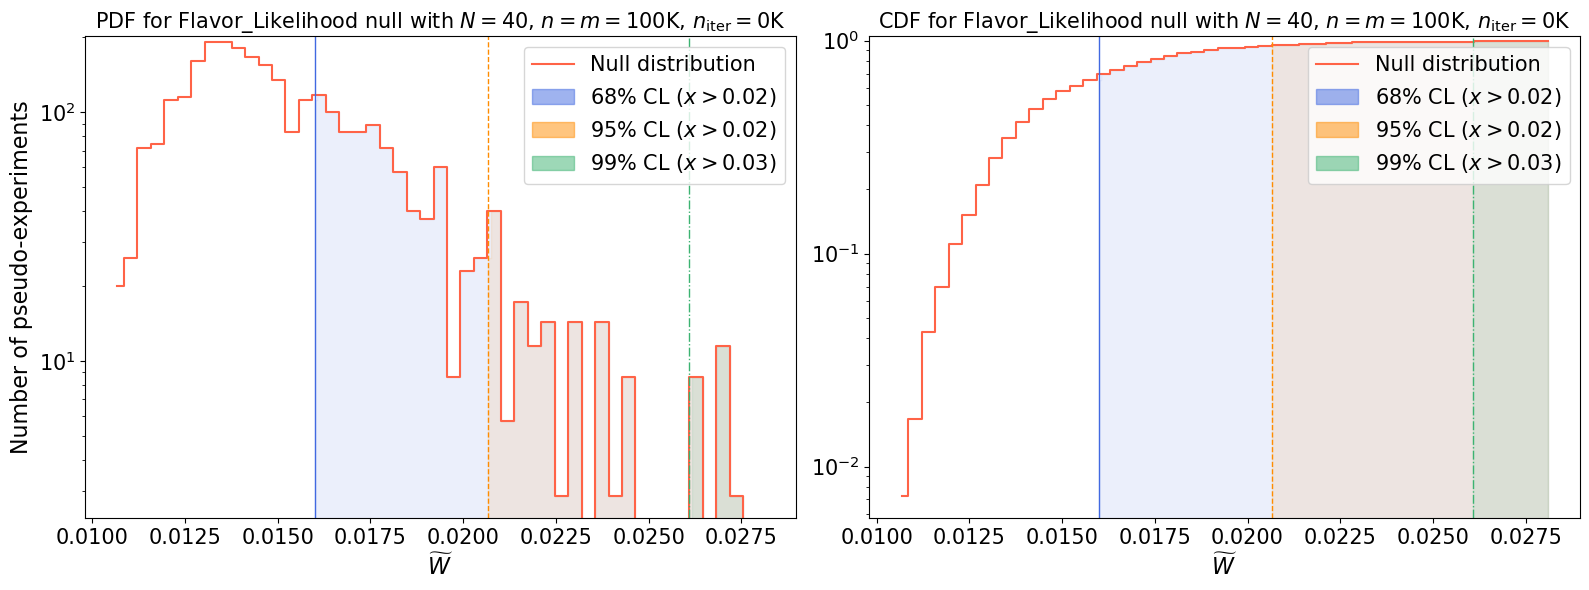

Time elapsed: 1.2592422123998404 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f148d18d120>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f12745930a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f1274591e10>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f12745904c0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f12745905e0>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0              6  $d_{\mathrm{FGD}}$   
1              1  $d_{\mathrm{MMD}}$   
2            250      $\overline{D}$   
3             20     $\widetilde{D}$   
4             20     $\widetilde{W}$   

                                           null_file  \
0  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
1  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
2  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
3  results/EW_MsplineN/run_1/tests/100K/null_hypo...   
4  results/EW_MsplineN/run_1/tests/100K/null_hypo...   

                                          thresholds  \
0  [[0.68, [652, 307], 1.021622037921622e-05], [0...   
1  [[0.68, [693, 326], -208.68130493164062], [0.9...   
2  [[0.68, [897, 422], 0.8951555464128067], [0.95...   
3  [[0.68, [652, 307], 0.9074872194067829], [0.95...   
4  [[0.68, [652, 307], 0.015997195177663882], [0....   

                                         null_figure  
0  results/EW_MsplineN/run_1/tests/100K/null_hypo...  
1  results/EW_MsplineN/run_1/tests/100K/null_hypo...  
2  results/EW_MsplineN/run_1/tests/100K/null_hypo...  
3  results/EW_MsplineN/run_1/tests/100K/null_hypo...  
4  results/EW_MsplineN/run_1/tests/100K/null_hypo...

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [ ]:
#l = len(dataset) // 2
l = 6_000_000
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 6000000 samples for dist_1_alt.


In [ ]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(50_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(50_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [ ]:
niter_alt = 60

TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter_alt*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter_alt*batch_size_test],
                                                      niter = niter_alt,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 60
batch_size = 100000
nchunks = 10
Iterating from 0 to 6 out of 60 .
Iterating from 6 to 12 out of 60 .
Iterating from 12 to 18 out of 60 .
Iterating from 18 to 24 out of 60 .
Iterating from 24 to 30 out of 60 .
Iterating from 30 to 36 out of 60 .
Iterating from 36 to 42 out of 60 .
Iterating from 42 to 48 out of 60 .
Iterating from 48 to 54 out of 60 .
Iterating from 54 to 60 out of 60 .
FGD metric calculation completed in 276.35213148314506 seconds.
Thresholds for metric fgd: [[0.68, [652, 307], 1.021622037921622e-05], [0.95, [912, 48], 1.2674806191292355e-05], [0.99, [950, 9], 1.4899036113828183e-05]]
Value of the test-statistic for the alternative hypothesis: 3.856781262266643e-05

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 60
batch_size = 100000
nchunks = 60
Iterating from 0 to 1 out of 60 .
I